# Heart Disease Diagnosis Using Machine Learning: A Comprehensive Study
---

## Phase 2: Predictive Modelling


**Group Name :** Project Group 48

**Group Members**

        Syeda Shabnam khan  S4020189
        Gudhurathulla S3955411
        Ajmal Farooq S3913688
       
**Date:**: 2 June 2024

---


## Table of Contents
* [Introduction](#itr)
  + [Aim](#aim)
  + [Phase 1 Summary](#phase-1-summary)
  + [Report Overview](#report-overview)
  + [Overview of Methodology](#overview-of-methodology)
* [Predictive Modelling Setup and Data Preparation](#predictive-modelling-setup-and-data-preparation)
   + [Python Setup](#python-setup)
   + [Python Utility Methods](#python-utility-methods)
   + [Data Cleaning](#data-cleaning)
   + [Separating Descriptive features and Target](#separating-descriptive-features-and-target)
   + [Encoding Categorical Descriptive Features](#encoding-categorical-descriptive-features)
   + [Encoding the Target Feature](#encoding-the-target-feature)
   + [Scaling of Descriptive Features](#scaling-of-descriptive-features)
* [Prediction Modelling - Feature Selection](#prediction-modelling-feature-selection)
   + [Feature Selection](#feature-selection)
   + [Spliting Data into Training and Test Sets](#splitting-data-into-training-and-test-sets)
* [Prediction Modelling - Model Fitting, Tuning and Prediction](#prediction-modelling-model-fitting-and-tuning)
   + [Cross Validation](#cross-validation)
   + [K-Nearest Neighbors (KNN)](#knn-training)
   + [Support Vector Classifier (SVC)](#svc-training)
   + [RandomForest Classifier](#rmf-training)
   + [DecisionTree Classifier](#dt-training)
   + [GradientBoosting Classifier](#gb-training)
* [Neural Network Model Fitting and Tuning](#neural-network-model-fitting-and-tuning)
   + [Background](#neural-network-background)
   + [Multilayer Perceptron Neural Network](#neural-network-mlp)
   + [MLP Hyperparameter Tuning and Visualisation](#neural-network-tuning)
   + [Performance evaluation using test data (All features)](#neural-network-evaluation-all-features)
   + [Performance evaluation using test data (Top 12 features)](#neural-network-evaluation-12-features)
* [Model Performance Comparison](#model-comparison)
   + [Model Cross-Validation AUC Evaluation Results During Tuning on Train Data](#model-cross-validation-evaluation-results)
   + [Model Cross-Validation AUC Evaluation Results on Train Data](#model-prediction-evaluation-results)
   + [Paired t-test - Test Data with All features](#paired-t-tests-all-feature)
* [Critique and Limitations](#critigue-and-limitations)
* [Summary and Conclusion](#summary-and-conclusions)
   + [Project Summary](#project-summary)
   + [Summary of Findings](#summary-of-findings)
   + [Conclusion](#conclusion)
* [References](#references)


## Introduction <a id='itr'></a>
---

### Aim<a id='aim'></a>

This report aims to evaluate the performance of machine learning algorithms in predicting the presence or absence of heart disease in individuals based on their clinical and demographic features. We analysed the dataset containing patients' medical histories, symptoms, and diagnostic test results to identify the best performing machine learning model for heart disease diagnosis. The importance of this evaluation lies in determining the feasibility of using machine learning as an assistive tool for diagnosing heart disease, potentially improving early detection and treatment outcomes.

### Phase 1 Summary<a id='phase-1-summary'></a>

This report is the second phase of a two-phase project. In the first phase, we focused on defining the problem and preprocessing the data. We conducted a thorough literature review to understand the progress made in heart disease prediction using machine learning. It provided an overview of the techniques and performance achieved with similar datasets.

For this project, we used the heart disease dataset from IEEE DataPort (Siddhartha, 2020), which consolidates five independent datasets: Cleveland, Hungarian, Switzerland, Long Beach VA, and Statlog (Heart). The dataset comprises 11 feature variables, one target variable, and 1190 instances. We cleaned the data to remove inconsistencies and addressed missing values. Following this cleaning process, the dataset was refined to contain 745 records comprising 11 descriptive features and a target feature. Subsequently, we employed descriptive statistics and visualizations to gain insights into the data.

We created boxplots for numeric values, identifying outliers in features such as resting_bp_s, cholesterol, and oldpeak. Frequency distribution analysis revealed that although there are more instances where heart disease is absent, the dataset is well-balanced in terms of target values. Bivariate analyses explored the relationships between features, as well as the features and the target variable. Key findings included:
- Women have slightly higher cholesterol levels than men, and those with higher cholesterol often report type 4 chest pain.
- Resting blood pressure and cholesterol alone are not strong indicators of heart disease.
- Patients with heart disease frequently complain about type 4 chest pain.
- Most male patients have heart disease, whereas most female patients do not.
- There is no distinct trend between fasting blood sugar and heart disease.
- Patients with exercise angina predominantly have heart disease.
- No prominent pattern was observed when plotting target against age and cholesterol, but patients with heart disease generally have higher cholesterol regardless of sex.

These observations provided a solid understanding of the variables and their relationships. It forms the basis for developing machine learning models for early prediction of heart disease.

### Report Overview <a id='report-overview'></a>

Diagnosing heart disease is a complex and demanding task in the medical field that requires a high level of precision and efficiency. This report presents a comprehensive evaluation of machine learning algorithms that will assist medical practitioners in diagnosis. Building upon phase 1, we prepared the data for predictive modeling by encoding and normalizing the features, resulting in 19 descriptive features. Feature selection was then employed to reduce the number of features for modeling to 12 features that exhibited higher statistical significance with respect to the target variable. However, this project also compared the performance of models trained with all features against those trained with the 12 most important features to determine if there were any statistically significant differences.

We split the data for training and testing our model and used 80% of the data for training the models. We trained 5 binary classification models and one neural network model. The models used are: K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Random Forest, Decision Tree, Gradient Boosting and Multi-Layer Perceptron (MLP).

The performance of the models was then evaluated using grid search. The grid search approach allows for a systematic exploration of hyperparameters to identify the best combination that maximizes the model's performance. Repeated stratified k-folds was used as the validation method, and Receiver Operating Characteristic Area Under the Curve (ROC AUC) was used as the performance metric.

Performance of models across two dataset (All features and top 12 features) was compared and evaluated for both trained data and test data. 

The results indicate that the RandomForest classifier performed best on our test dataset, with an ROC-AUC score of 0.913 for all features and 0.912 for the top 12 features. This suggests that the model trained on the subset of 12 features performed nearly as well as the model trained on all features, despite the reduced feature set. The similarity in performance suggests that the top 12 features capture much of the essential information needed for classification. This is advantageous as it simplifies the model, potentially improves generalization, and reduces computational complexity.

Furthermore, this model showed high accuracy in distinguishing between true positives and false positives on the test data.




### Overview of Methodology <a id='overview-of-methodology'></a>

In this section we discuss the steps we have taken to build and evaluate the machine learning models for heart disease detection.

Preprocessing: In the first phase of the project, we carried out most of the data preprocessing tasks including removal of missing values and inconsistencies. In this phase, the target variable was separated from the features. For the nominal features, such as chest pain type, resting ECG, and ST slope, we applied one-hot encoding to convert them into a binary format suitable for machine learning algorithms. To normalize the data, we used the MinMaxScaler from scikit-learn, which scales features to a range between 0 and 1. This step is essential because some of the models used in this phase require normalized data.

Feature Selection: We performed feature selection to identify the top 12 most relevant features. Using the F-score method, which measures the relationship between each feature and the target variable, we selected the features that had the highest scores. We achieved this using SelectKBest from scikit-learn feature selection library and used f_classifier as the input for score_func. The top 12 features were then used to train our models.

Data split and validation: We used 80-20 ratio to split our data for training and testing. To cross-validate, repeated stratified k-folds with 5 folds and 3 repeats was used. 

Model selection and hyperparameter tuning: We compared five classification models: K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Random Forest, Decision Tree, and Gradient Boosting. Additionally, we trained our dataset using the Multi-Layer Perceptron (MLP), an artificial neural network (ANN) classifier used for supervised learning. Grid search was employed to determine the optimal hyperparameters for each classifier. We evaluated the models based on the ROC AUC score to determine their performance. We used this metric because it measures how well the model distinguishes between true positive and false positive. As this is a medical dataset, we want to refrain from diagnosing a healthy person with heart disease. Therefore, we are particularly focused on achieving high ROC AUC which signifies having less false positive.

The preprocessing, modelling and evaluation were all done using scikit-learn library. Additionally, pandas, numpy and matplotlib were used for data handling and plotting.

The detailed results and performance metrics for each model, including hyperparameter configurations and ROC AUC scores, are provided in the following sections.

Finally, the performances of the models on both training and testing data are compared and evaluated for both the full feature set and the top 12 features.


## Predictive Modelling Setup and Data Preparation<a id='predictive-modelling-setup-and-data-preparation'></a>
---

This section outlines the Python setup and data cleaning steps necessary for the predictive modeling. For detailed information on the data cleaning process, please refer to Phase 1 of this project. In this phase, we will execute the data cleaning Python commands without displaying the output.

### Python Setup <a id='python-setup'>
Importing Python modules and defining initial configurations.

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import python modules processing data
import pandas as pd
import numpy as np
from scipy import stats

#display all columns
pd.set_option('display.max_colwidth', None)  # Expand column width to fit the contents
pd.set_option('display.max_columns', None)  # Display all columns

#import python modules for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn-v0_8")

#import python modules of modelling
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_classif

### Python Utility Methods <a id='python-utility-methods'>

In [2]:
# custom function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

### Data Cleaning<a id='data-cleaning'>

Phase 1 details the cleaning process. Here, we execute the final commands to obtain cleaned data, summarizing the cleaning actions conducted.

In [3]:
#load the dataset
df_name = 'Phase2_Group48.csv'
dataset = pd.read_csv(df_name)

# Remove white spaces and convert to lowercase in column names
dataset.columns = dataset.columns.str.strip().str.replace(' ', '_').str.lower()

# Drop rows with missing values
zero_mask = (dataset['resting_bp_s']==0) | (dataset['cholesterol']==0) | (dataset['oldpeak'] <0)
dataset.drop(dataset[zero_mask].index, inplace=True)

#drop duplicates
dataset.drop_duplicates(inplace=True)

Let's ensure that the dimensions match the Phase 1 end cleaning result, where the dataset contains 745 records with 11 descriptive features and a target feature.

In [4]:
dataset.shape

(745, 12)

Let's ensure that there are no missing values in the dataset.

In [5]:
dataset.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
st_slope               0
target                 0
dtype: int64

Here's a preview of 5 randomly selected rows from the cleaned dataset

In [6]:
dataset.sample(5, random_state=999)

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
129,42,1,3,120,228,0,0,152,1,1.5,2,0
861,51,0,3,140,308,0,2,142,0,1.5,1,0
669,65,0,3,140,417,1,2,157,0,0.8,1,0
573,64,1,4,150,193,0,1,135,1,0.5,2,1
560,64,1,4,134,273,0,0,102,1,4.0,3,1


Summary statistics for the entire cleaned dataset are displayed below.

In [7]:
dataset.describe()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,52.906040,0.755705,3.163758,133.036242,244.747651,0.167785,0.638926,140.209396,0.385235,0.902953,1.587919,0.477852
std,9.489625,0.429957,0.956037,17.290451,59.113689,0.373927,0.839123,24.536108,0.486978,1.072953,0.600729,0.499845
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,1.000000,2.000000,120.000000,208.000000,0.000000,0.000000,122.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,237.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000
75%,59.000000,1.000000,4.000000,140.000000,275.000000,0.000000,1.000000,160.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


### Separating Descriptive features and Target <a id='separating-descriptive-features-and-target'>

Before constructing a model, it is essential to segregate the descriptive features from the target features.

In [8]:
#### Seperating data and target
target = dataset.iloc[:, -1]
Data = dataset.iloc[:, :-1]

### Encoding Categorical Descriptive Features<a id='encoding-categorical-descriptive-features'>
All columns in the dataset are already in numerical form. However, there are 3 nominal descriptive features that need to be encoded using one-hot encoding.

In [9]:
# The dataset does not contain columns of object type; all are numerical. 
# Here is a list of the columns that require one-hot encoding.
categorical_cols = ['chest_pain_type','resting_ecg','st_slope']
#  use one-hot-encoding
Data = pd.get_dummies(Data, columns=categorical_cols)

All nominal descriptive features have now been one-hot encoded. The data is now ready for scaling and contains 19 features.

In [10]:
Data.columns

Index(['age', 'sex', 'resting_bp_s', 'cholesterol', 'fasting_blood_sugar',
       'max_heart_rate', 'exercise_angina', 'oldpeak', 'chest_pain_type_1',
       'chest_pain_type_2', 'chest_pain_type_3', 'chest_pain_type_4',
       'resting_ecg_0', 'resting_ecg_1', 'resting_ecg_2', 'st_slope_0',
       'st_slope_1', 'st_slope_2', 'st_slope_3'],
      dtype='object')

In [11]:
Data.sample(5, random_state=999)

,age,sex,resting_bp_s,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_angina,oldpeak,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,resting_ecg_0,resting_ecg_1,resting_ecg_2,st_slope_0,st_slope_1,st_slope_2,st_slope_3
129,42,1,120,228,0,152,1,1.5,0,0,1,0,1,0,0,0,0,1,0
861,51,0,140,308,0,142,0,1.5,0,0,1,0,0,0,1,0,1,0,0
669,65,0,140,417,1,157,0,0.8,0,0,1,0,0,0,1,0,1,0,0
573,64,1,150,193,0,135,1,0.5,0,0,0,1,0,1,0,0,0,1,0
560,64,1,134,273,0,102,1,4.0,0,0,0,1,1,0,0,0,0,0,1


### Encoding the Target Feature<a id='encoding-the-target-feature'>
The target feature is already in binary form, with the positive class labeled as 1.

In [12]:
target.value_counts()

0    389
1    356
Name: target, dtype: int64

### Scaling of Descriptive Features<a id='scaling-of-descriptive-features'>
After encoding all the categorical features, we apply min-max scaling to the descriptive features to normalize them to the range of 0 to 1.

In [13]:
Data = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(Data), columns=Data.columns)
             

The final descriptive features are now scaled, with binary features remaining unchanged.

In [14]:
Data

,age,sex,resting_bp_s,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_angina,oldpeak,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,resting_ecg_0,resting_ecg_1,resting_ecg_2,st_slope_0,st_slope_1,st_slope_2,st_slope_3
0,0.244898,1.0,0.444444,0.393822,0.0,0.774436,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.428571,0.0,0.629630,0.183398,0.0,0.654135,0.0,0.161290,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.183673,1.0,0.351852,0.382239,0.0,0.218045,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.408163,0.0,0.425926,0.249035,0.0,0.293233,1.0,0.241935,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.530612,1.0,0.537037,0.212355,0.0,0.398496,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,0.346939,1.0,0.166667,0.345560,0.0,0.473684,0.0,0.193548,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
741,0.816327,1.0,0.481481,0.208494,1.0,0.541353,0.0,0.548387,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
742,0.591837,1.0,0.351852,0.088803,0.0,0.345865,1.0,0.193548,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
743,0.591837,0.0,0.351852,0.291506,0.0,0.789474,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Prediction Modelling - Feature Selection <a id='prediction-modelling-feature-selection'></a>

### Feature Selection<a id='feature-selection'></a>

We will analyze the ten most important features selected by the F-score statistical filter method. This analysis will provide meaningful insights into the dataset, revealing which features are most relevant to the target feature and are likely to be associated with heart disease. Here, we use the complete dataset to identify the most important features, as the dataset is small.

However, during the hyperparameter tuning phase, we use both the top 12 features and the full set of 19 features to determine the optimal number of features for each classifier.

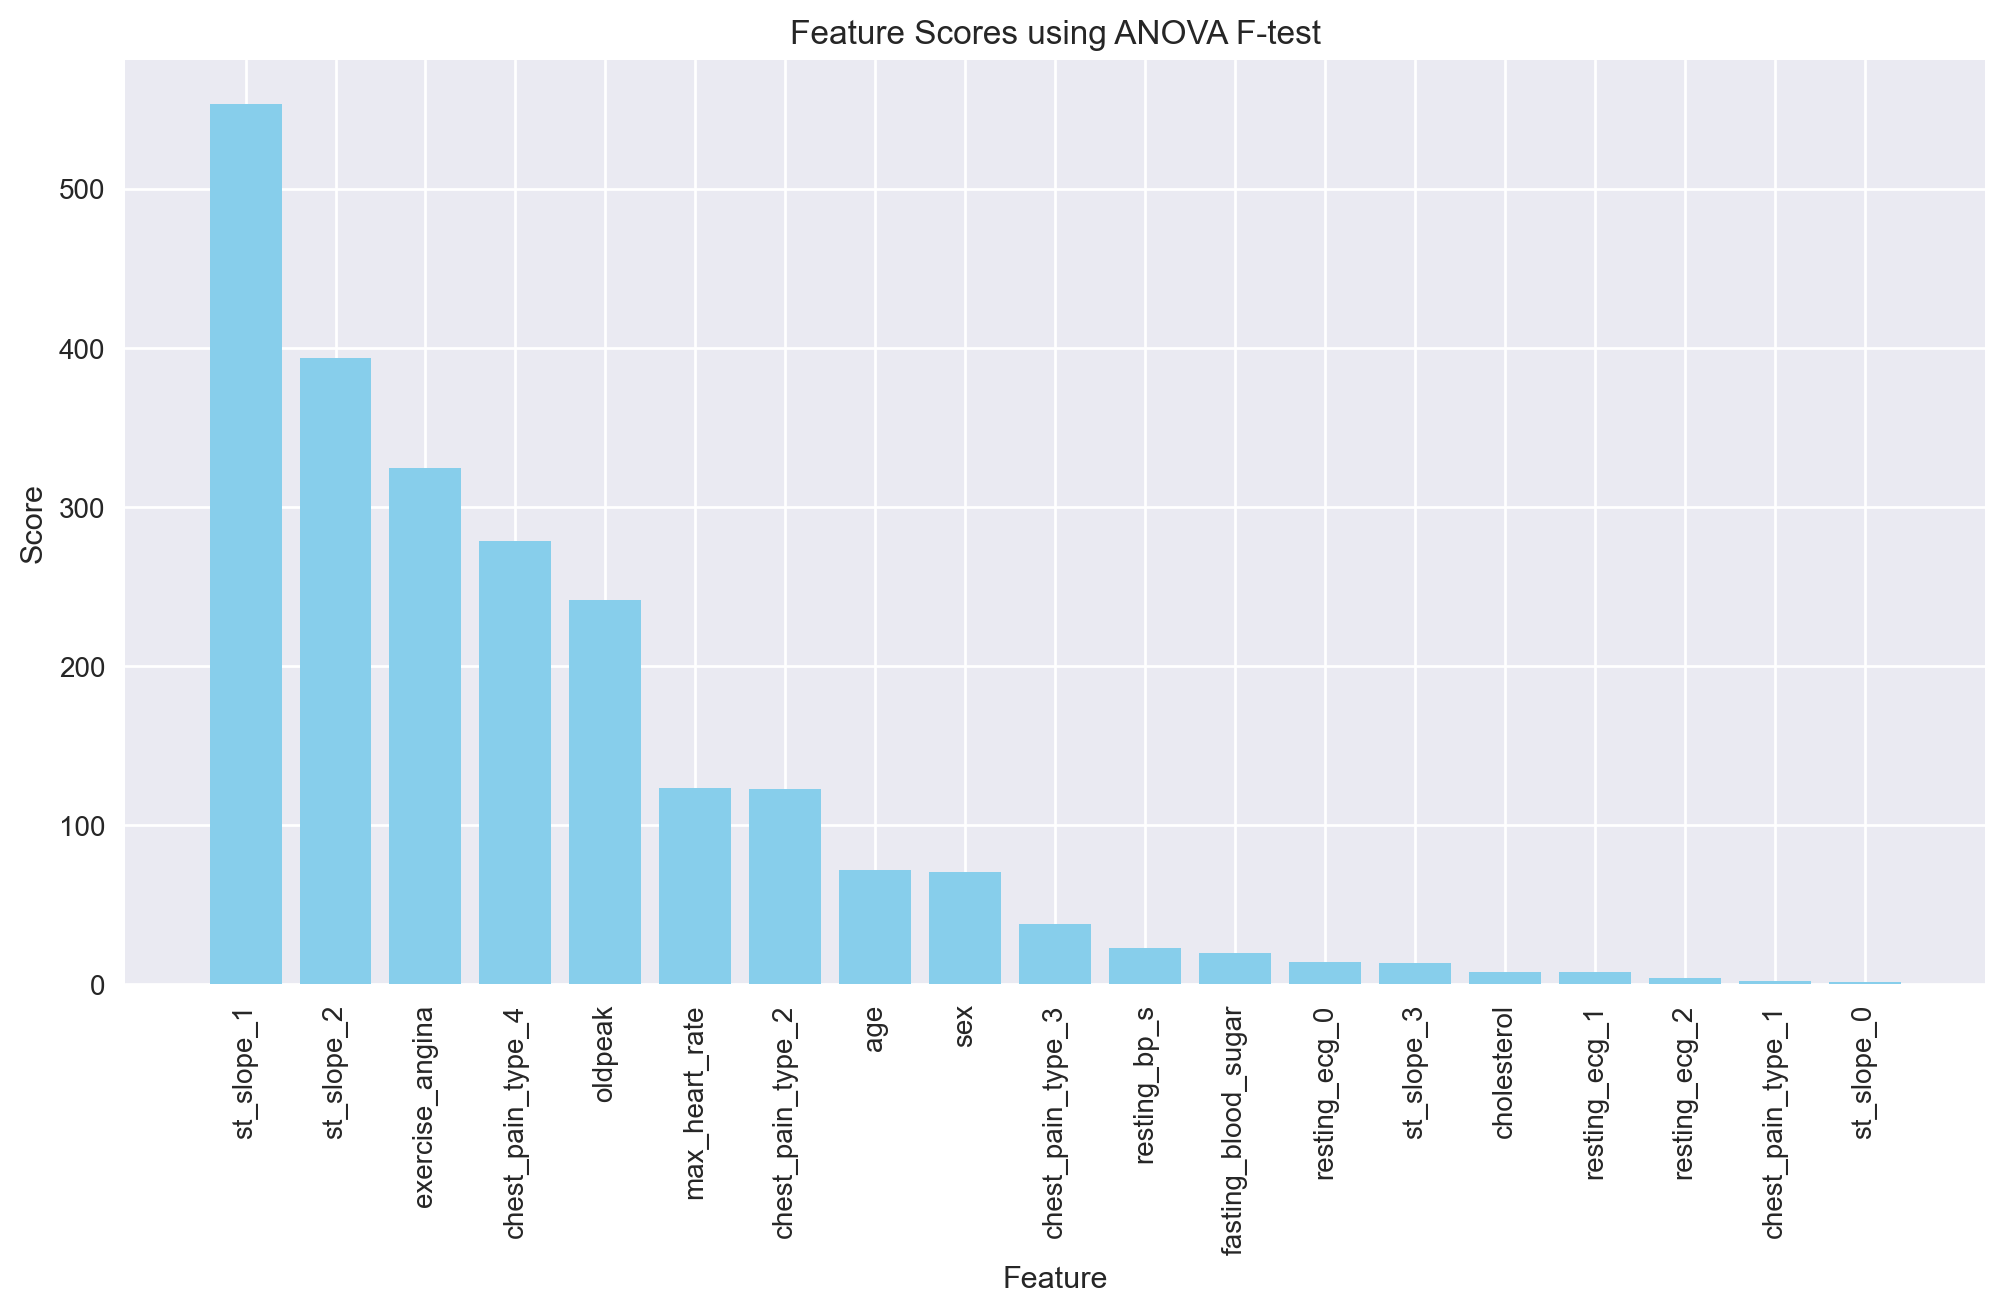

In [15]:
fs_selector = SelectKBest(score_func=f_classif, k=12)  # Select top 12 features
X_new = fs_selector.fit_transform(Data, target)

# Get the scores for each feature
scores = fs_selector.scores_

# Create a dataframe for visualization
feature_scores = pd.DataFrame({'Feature': Data.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)


# Plot the feature scores
plt.figure(figsize=(12, 6))
plt.bar(feature_scores['Feature'], feature_scores['Score'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Feature Scores using ANOVA F-test')
plt.xticks(rotation=90)
plt.show()

<center>Graph 1 - Feature Scores Obtained Using the ANOVA F-Test Feature Selection Process on the Heart Disease Dataset</center>

Graph 1 shows the scores for each feature obtained from a feature selection process applied to the dataset used to predict heart disease in patients. The scores represent the importance of each feature in predicting the target variable (heart disease).

The ANOVA F-test is used to determine the statistical significance of each feature with respect to the target variable. Higher scores indicate greater importance and relevance in distinguishing between different classes in the target variable.

Features like "st_slope_1", "st_slope_2", "exercise_angina", and "chest_pain_type_4" have the highest scores, indicating that they are highly influential in predicting heart disease. Conversely, features with lower scores, such as "resting_ecg_2", "chest_pain_type_1", and "st_slope_0", are considered less important in predicting heart disease based on this feature selection process.

In the Fitting and Tuning section, we will use the top 12 most important features from this feature selection process for hyperparameter tuning. Additionally, we will also evaluate the model using the full feature set to determine if there is a significant difference in performance.

Here are the top 12 most important features.

In [16]:
# Get the selected feature names and create a new dataset
selected_features = Data.columns[fs_selector.get_support()]
Data_FS = Data[selected_features]
Data_FS.head()

,age,sex,resting_bp_s,fasting_blood_sugar,max_heart_rate,exercise_angina,oldpeak,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,st_slope_1,st_slope_2
0,0.244898,1.0,0.444444,0.0,0.774436,0.0,0.000000,1.0,0.0,0.0,1.0,0.0
1,0.428571,0.0,0.629630,0.0,0.654135,0.0,0.161290,0.0,1.0,0.0,0.0,1.0
2,0.183673,1.0,0.351852,0.0,0.218045,0.0,0.000000,1.0,0.0,0.0,1.0,0.0
3,0.408163,0.0,0.425926,0.0,0.293233,1.0,0.241935,0.0,0.0,1.0,0.0,1.0
4,0.530612,1.0,0.537037,0.0,0.398496,0.0,0.000000,0.0,1.0,0.0,1.0,0.0


### Spliting Data Into Training and Test Sets<a id='splitting-data-into-training-and-test-sets'>
The cleaned dataset contains 745 records, so sampling is unnecessary given the dataset's size. We split the dataset into training and testing partitions with a 70:30 ratio using stratification, resulting in 521 records in the training set and 224 records in the testing set.

Here, we are splitting the dataset into training and testing sets using all features.

In [17]:
#split the data using the full feature dataset
D_train, D_test, t_train, t_test = train_test_split(Data.values, 
                                                    target.values, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=target.values)
print(D_train.shape)
print(D_test.shape)
print(t_train.shape)
print(t_test.shape)

(596, 19)
(149, 19)
(596,)
(149,)


Here, we are splitting the dataset into training and testing sets using 12 most important features.

In [18]:
#split the data using the top 12 most important feature dataset
D_train_FS, D_test_FS, t_train_FS, t_test_FS = train_test_split(Data_FS.values, 
                                                    target.values, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=target.values)
print(D_train_FS.shape)
print(D_test_FS.shape)
print(t_train_FS.shape)
print(t_test_FS.shape)

(596, 12)
(149, 12)
(596,)
(149,)


Let's ensure a similar distribution of positive and negative target classes in both the training and testing sets. Both sets show a 48% positive class.

In [19]:
#check distribution on the full dataset
print((sum(t_train==1)/len(t_train)).round(2))
print((sum(t_test==1)/len(t_test)).round(2))

0.48
0.48


In [20]:
#check distribution on the top 12 feature dataset
print((sum(t_train_FS==1)/len(t_train_FS)).round(2))
print((sum(t_test_FS==1)/len(t_test_FS)).round(2))

0.48
0.48


## Prediction Modelling - Model Fitting,  Tuning and Prediction <a id='prediction-modelling-model-fitting-and-tuning'></a>

We will train and tune **six** different models, including one <u>Neural Network</u>, using both the 12-feature and full-feature training datasets.

Here, we use a grid search approach with stratified 5-fold cross-validation to systematically explore all parameter options to identify the best combination that maximizes the model's performance.

### Cross Validation<a id='cross-validation'></a>
We will train all the models using 5-fold stratified cross-validation with 3 repetitions for hyperparameter tuning.

For test evaluation, we will assess the models' performance on unseen test data using stratified 5-fold cross-validation without repetition.

In [21]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)


cv_method_ttest = StratifiedKFold(n_splits=5, shuffle=True, random_state=111)

### K-Nearest Neighbors (KNN) <a id='knn-training'></a>

The K-Nearest Neighbors (KNN) classifier is a simple, yet effective algorithm used for classification tasks. It operates by finding the 'k' closest data points in the feature space to make predictions.

Key Parameters:
* Number of Neighbors (n_neighbors):
    * Specifies the number of nearest neighbors to consider.
    * Smaller 'k' values (e.g., 1 or 3) capture more noise and can overfit, while larger 'k' values (e.g., 10 or 20) provide a more generalized model.

* Distance Metric (metric):
    * Defines the method used to measure distance between data points.
    * Common metrics include:
        * Euclidean Distance: Straight-line distance in Euclidean space.
        * Manhattan Distance: Sum of absolute differences between coordinates.
        * Minkowski Distance: A generalization that includes Euclidean and Manhattan distances.

Optimal tuning of these parameters through methods like cross-validation can significantly enhance the KNN classifier's performance, balancing sensitivity to data nuances with generalization ability.

Let's systematically explore all parameter options to identify the optimal combination that maximizes the model's performance.

#### Using all feature dataset
Using the split dataset with all the features.

In [22]:
# Hyperparameter tuning for KNN
KNN = KNeighborsClassifier()
param_grid_KNN = {
    'n_neighbors': np.arange(1, 31, 2),  # Test odd numbers from 1 to 30
    'metric': ['euclidean', 'manhattan']
}
grid_search_KNN = GridSearchCV(estimator=KNN,
                                  param_grid=param_grid_KNN, 
                                  cv=cv_method,
                                  n_jobs=-2,
                                  scoring='roc_auc',
                                  verbose=1)


grid_search_KNN.fit(D_train, t_train);

Fitting 15 folds for each of 30 candidates, totalling 450 fits


In [23]:
# Best parameters and score
print('Using all features:')
print('Best KNN Parameters', grid_search_KNN.best_params_)
print('Best KNN Cross-Validation AUC Score:', grid_search_KNN.best_score_.round(3))


Using all features:
Best KNN Parameters {'metric': 'euclidean', 'n_neighbors': 27}
Best KNN Cross-Validation AUC Score: 0.928


Using all features, the best performing KNN model was achieved with the following parameters: 'metric' set to 'euclidean' and 'n_neighbors' set to 27. This configuration resulted in a cross-validation AUC score of 0.928, indicating that the model performed well in distinguishing between classes and making accurate predictions on the dataset.

#### Using top 12 features
Using the dataset containing the 12 most important features.

In [24]:
# Hyperparameter tuning for KNN
grid_search_KNN_FS = GridSearchCV(estimator=KNN,
                                  param_grid=param_grid_KNN, 
                                  cv=cv_method,
                                  n_jobs=-2,
                                  scoring='roc_auc',
                                  verbose=1)
grid_search_KNN_FS.fit(D_train_FS, t_train_FS);

Fitting 15 folds for each of 30 candidates, totalling 450 fits


In [25]:
# Best parameters and score
print('Using top 12 features:')
print('Best KNN Parameters', grid_search_KNN_FS.best_params_)
print('Best KNN Cross-Validation AUC Score:', grid_search_KNN_FS.best_score_.round(3))

Using top 12 features:
Best KNN Parameters {'metric': 'manhattan', 'n_neighbors': 11}
Best KNN Cross-Validation AUC Score: 0.929


When using only the top 12 features, the best performing KNN model was achieved with the following parameters: 'metric' set to 'manhattan' and 'n_neighbors' set to 11. Despite using a reduced feature set, this configuration resulted in a slightly improved cross-validation AUC score of 0.929 compared to using all features. This suggests that the top 12 features contain the most relevant information for the classification task, leading to better model performance.

Let's examine the top-performing combinations from the grid search results.

In [26]:
#format the results using utility method
gs_results_KNN = get_search_results(grid_search_KNN)
gs_results_KNN.head()

,mean_score,std_score,max_score,min_score,metric,n_neighbors
13,0.928236,0.030587,0.969298,0.856537,euclidean,27
24,0.927907,0.027688,0.970006,0.864035,manhattan,19
12,0.927636,0.030522,0.968732,0.854839,euclidean,25
25,0.927575,0.029409,0.972128,0.858517,manhattan,21
27,0.927543,0.03097,0.967883,0.854839,manhattan,25


In [27]:
#format the results using utility method
gs_results_KNN_FS = get_search_results(grid_search_KNN_FS)
gs_results_KNN_FS.head()

,mean_score,std_score,max_score,min_score,metric,n_neighbors
20,0.92892,0.027691,0.972849,0.880589,manhattan,11
29,0.928557,0.029298,0.964346,0.863045,manhattan,29
26,0.928454,0.028728,0.964205,0.870402,manhattan,23
22,0.928396,0.028178,0.969786,0.880164,manhattan,15
21,0.928379,0.027466,0.972013,0.883418,manhattan,13


Additionally, the performance scores among the top 5 combinations in both the full feature and top 12 feature sets show minimal variance. This indicates that the top 12 features are highly informative and capture much of the predictive power present in the full dataset. Using the top 12 features provided a slight edge over the full dataset, suggesting that these features contain the most relevant information for the classification task.

#### Tuning Plots
Below are the plots displaying the grid search results for all features.

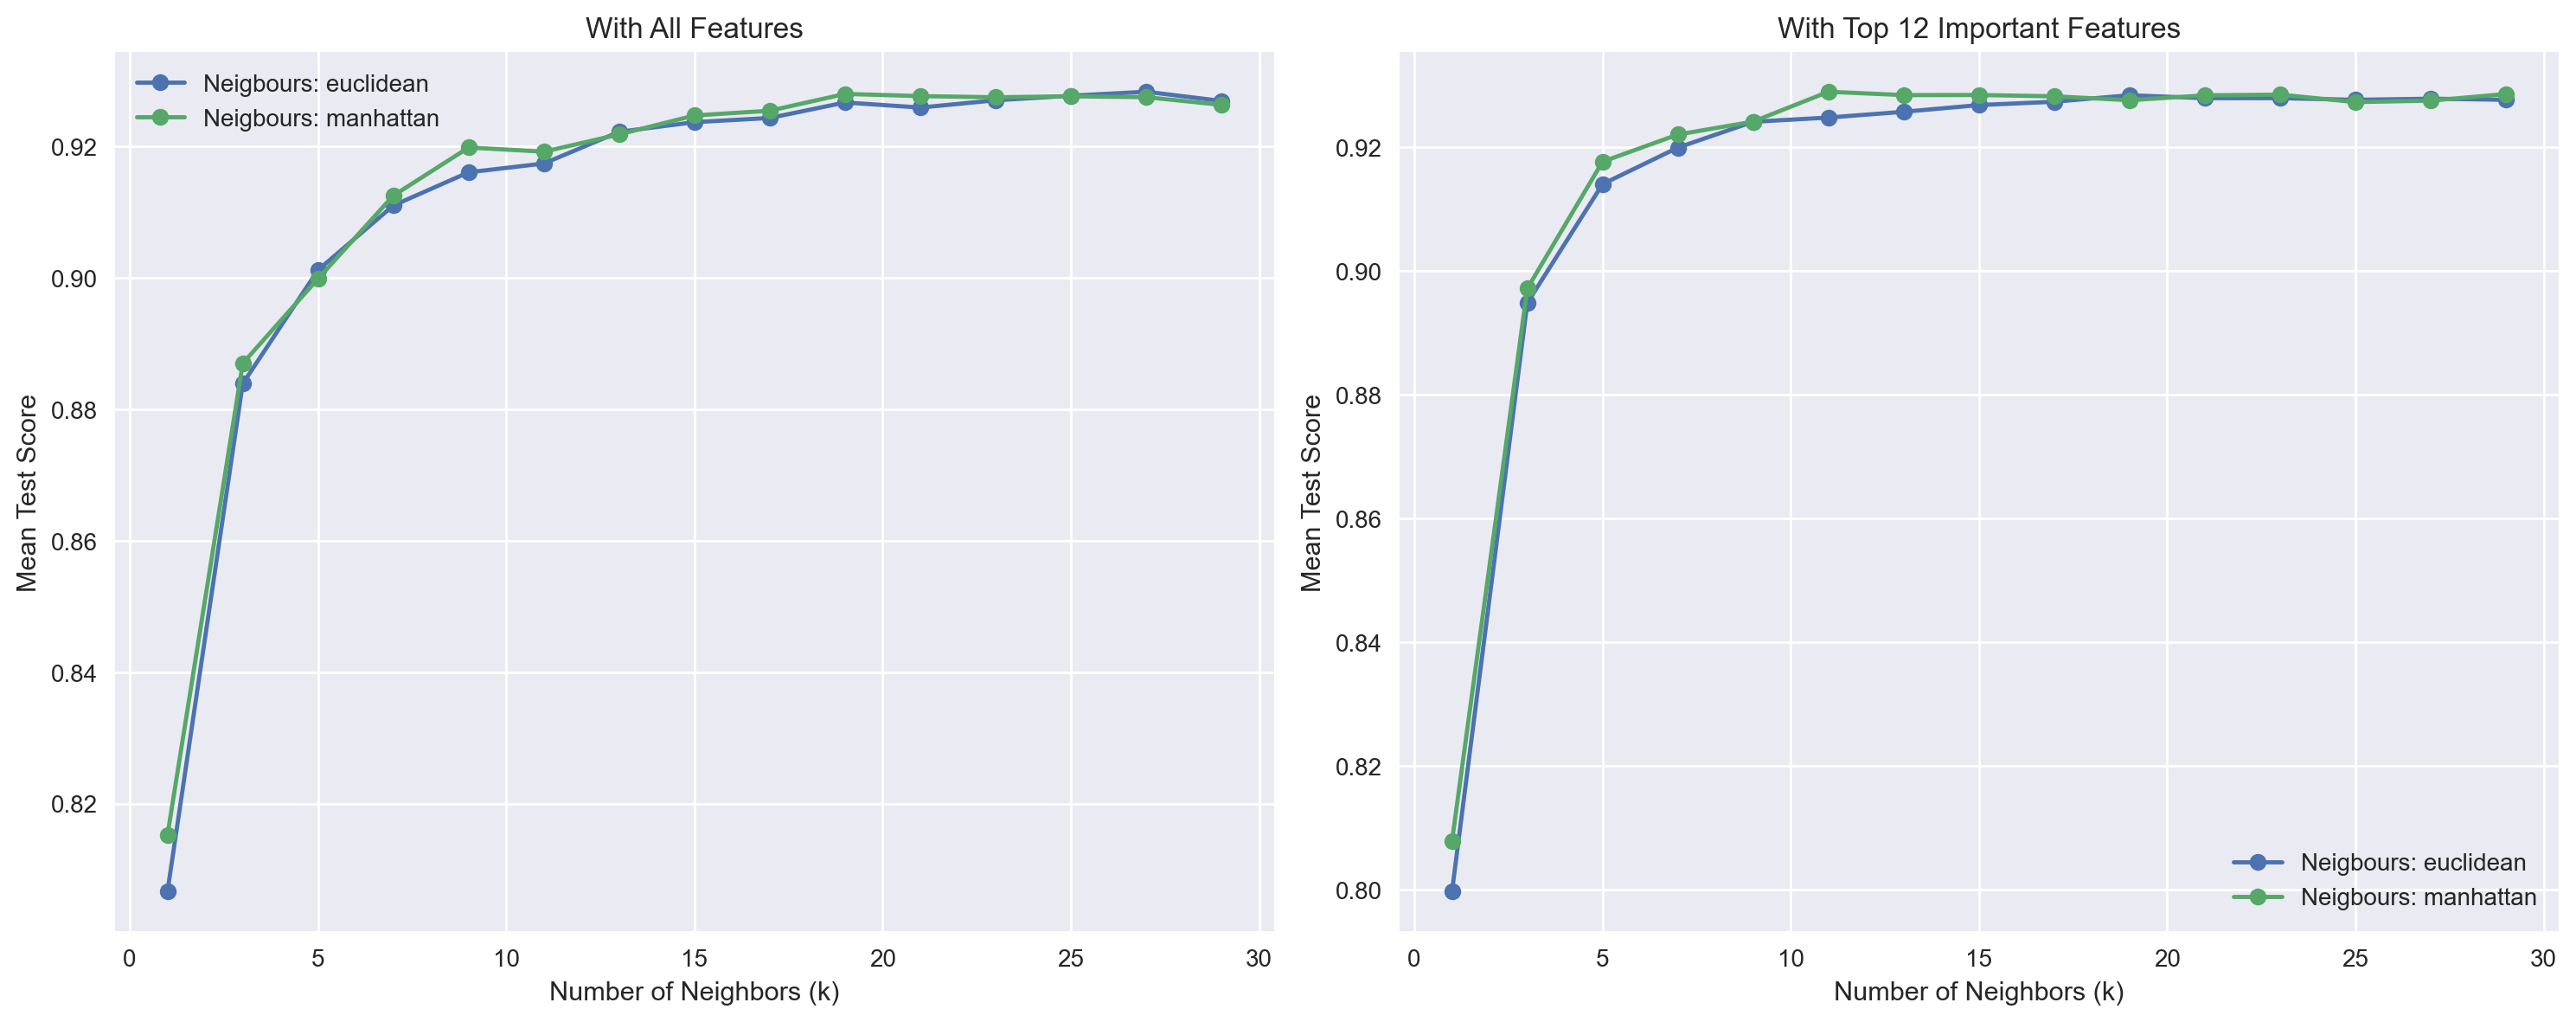

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for All features
for i in param_grid_KNN['metric']:
    temp = gs_results_KNN[gs_results_KNN['metric'] == i]
    temp_avg = temp.groupby('n_neighbors').agg({'mean_score': 'mean'})
    ax1.plot(temp_avg, marker='o', label='Neigbours: ' + str(i))
ax1.legend()
ax1.set_xlabel('Number of Neighbors (k)')
ax1.set_ylabel('Mean Test Score')
ax1.set_title('With All Features')
ax1.grid(True)

# Plot for the 12 top features
for i in param_grid_KNN['metric']:
    temp = gs_results_KNN_FS[gs_results_KNN_FS['metric'] == i]
    temp_avg = temp.groupby('n_neighbors').agg({'mean_score': 'mean'})
    ax2.plot(temp_avg, marker='o', label='Neigbours: ' + str(i))
ax2.legend()
ax2.set_xlabel('Number of Neighbors (k)')
ax2.set_ylabel('Mean Test Score')
ax2.set_title('With Top 12 Important Features')
ax2.grid(True)

plt.tight_layout()
plt.show()

<center>Graph 2 - KNN grid search results plot</center>

Based on the visualizations of the performance metrics (mean_score) of different numbers of neighbors for both Manhattan and Euclidean distances, we can make the following observations:

Manhattan Distance consistently provides higher and more stable mean_scores compared to Euclidean distance across both datasets (top 12 features and the full feature set).

**Top 12 Features:** 
- Shows marginally better peak performance with fewer neighbors, indicating that selecting the top 12 features can be more efficient.

**Full Feature Set:**
- High performance with a slightly higher number of neighbors, showing that the full set is viable but may require more tuning.

In summary, based on the analysis of both datasets, it is evident that the model trained on the top 12 feature set consistently produces better performance metrics compared to the full feature sets.


#### Performance evaluation using test data (All features)

Let's evaluate the performance of the model using the best optimal parameters obtained from the hyperparameter tuning. We will train this model on the test dataset with all features.

Now, we will fit the tuned classifier with these optimal parameters on the test data using cross-validation to determine the model's performance. The test data, which was not used during training, will provide an unbiased evaluation of the tuned classifier's performance.

In [29]:
# Train the KNN model with best paramters from Full Feature dataset
test_knn = KNeighborsClassifier(n_neighbors=27, metric='euclidean')

cv_results_KNN = cross_val_score(estimator=test_knn,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
knn_auc = cv_results_KNN.mean()

print('KNN AUC Score with All Features:', knn_auc)

KNN AUC Score with All Features: 0.9001904761904763


#### Performance evaluation using test data (Top 12 features)
Similarly, we will train the tuned KNN classifier with the best parameters obtained using the top 12 features on the test data.

In [30]:
# Train the KNN model with best paramters from Top 12 Feature dataset
test_knn_fs = KNeighborsClassifier(n_neighbors=11, metric='manhattan')

cv_results_KNN_fs = cross_val_score(estimator=test_knn_fs,
                                 X=D_test_FS,
                                 y=t_test_FS, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
knn_auc_fs = cv_results_KNN_fs.mean()

print('KNN AUC Score with 12 Selected Features:', knn_auc_fs)

KNN AUC Score with 12 Selected Features: 0.8906785714285714


Based on the comparison of KNN AUC scores between using all features and using the 12 selected features, it is observed that:

* AUC Score with All Features: 0.900
    * Using all features resulted in an AUC score of approximately 0.900, indicating the model's ability to distinguish between classes when trained on the entire feature set.


* AUC Score with 12 Selected Features: 0.891
    * Using only the top 12 selected features resulted in a slightly lower AUC score of approximately 0.891. Despite the reduced feature set, the model maintained a relatively high performance, suggesting that these 12 features contain significant discriminatory information for the classification task.
    
The difference in AUC scores between using all features and using the top 12 features is relatively small. This indicates that while the full feature set may contain some additional information, the top 12 features capture a large portion of the discriminatory power required for classification.

### Support Vector Classifier (SVC)<a id='svc-training'></a>

Support Vector Classification (SVC) is a supervised machine learning algorithm used for classification tasks. It works by finding the hyperplane that best separates different classes in the feature space. 

Here is a brief description of the key parameters:

C (Regularization Parameter):
 * C is the regularization parameter that controls the trade-off between maximizing the margin (decision boundary) and minimizing the classification error.
    
Kernel:
 * The kernel function is used to transform the input features into a higher-dimensional space where it's easier to separate the classes linearly.
 * Common kernel functions include 'linear', 'poly' (polynomial), 'rbf' (radial basis function), and 'sigmoid'.

Gamma:
  * Gamma is a parameter for non-linear hyperplanes.
  
  
Optimal tuning of these parameters through methods like cross-validation can significantly enhance the SVC classifier's performance, balancing sensitivity to data nuances with generalization ability.

Let's systematically explore all parameter options to identify the optimal combination that maximizes the model's performance.


#### Using all feature dataset
Using the split dataset with all the features.

In [31]:
# Hyperparameter tuning for SVC
SVCc = SVC()
param_grid_SVC = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search_SVC = GridSearchCV(estimator=SVCc,
                                  param_grid=param_grid_SVC, 
                                  cv=cv_method,
                                  n_jobs=-2,
                                  scoring='roc_auc',
                                  verbose=1)

grid_search_SVC.fit(D_train, t_train);

Fitting 15 folds for each of 20 candidates, totalling 300 fits


In [32]:
# Best parameters and score
print('Using all features:')
print('Best SVC Parameters', grid_search_SVC.best_params_)
print('Best SVC Cross-Validation AUC Score:', grid_search_SVC.best_score_.round(3))

Using all features:
Best SVC Parameters {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best SVC Cross-Validation AUC Score: 0.933


When using all features, the best-performing SVC model was achieved with the following parameters: 'C' set to 10, 'gamma' set to 'auto', and 'kernel' set to 'rbf'. This configuration resulted in a cross-validation AUC score of 0.933, indicating that the model performed well in distinguishing between classes and making accurate predictions on the dataset.

#### Using top 12 features
Using the dataset containing the 12 most important features.

In [33]:
grid_search_SVC_FS = GridSearchCV(estimator=SVCc,
                                  param_grid=param_grid_SVC, 
                                  cv=cv_method,
                                  n_jobs=-2,
                                  scoring='roc_auc',
                                  verbose=1)

grid_search_SVC_FS.fit(D_train_FS, t_train_FS);

Fitting 15 folds for each of 20 candidates, totalling 300 fits


In [34]:
# Best parameters and score
print('Using 12 top features:')
print('Best SVC Parameters', grid_search_SVC_FS.best_params_)
print('Best SVC Cross-Validation AUC Score:', grid_search_SVC_FS.best_score_.round(3))

Using 12 top features:
Best SVC Parameters {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVC Cross-Validation AUC Score: 0.928


Despite the reduced feature set, the SVC model using the top 12 features achieved a cross-validation AUC score of 0.928, which is reasonably similar to the score of 0.933 achieved using all features. This suggests that the top 12 features capture much of the relevant information necessary for classification. Given this similarity in performance and the potential benefits of using a smaller feature set (such as reduced computational complexity and improved generalization), the top 12 features may be preferred for this dataset.

Let's examine the top-performing combinations from the grid search results.

In [35]:
#format the results using utility method
gs_results_SVC = get_search_results(grid_search_SVC)
gs_results_SVC.head()

,mean_score,std_score,max_score,min_score,C,gamma,kernel
11,0.933026,0.031167,0.974816,0.863894,10,auto,rbf
5,0.927854,0.031931,0.974533,0.855971,1,scale,rbf
4,0.924184,0.03126,0.963497,0.854839,1,scale,linear
6,0.924184,0.03126,0.963497,0.854839,1,auto,linear
10,0.924065,0.031399,0.960668,0.858517,10,auto,linear


In [36]:
#format the results using utility method
gs_results_SVC_FS = get_search_results(grid_search_SVC_FS)
gs_results_SVC_FS.head()

,mean_score,std_score,max_score,min_score,C,gamma,kernel
5,0.928309,0.027957,0.968874,0.868138,1,scale,rbf
11,0.92769,0.031203,0.970203,0.856819,10,auto,rbf
14,0.926763,0.029148,0.963214,0.86163,100,auto,linear
12,0.926763,0.029148,0.963214,0.86163,100,scale,linear
10,0.926743,0.029246,0.964629,0.86163,10,auto,linear


The performance difference between using all features and using the top 12 features is relatively small, indicating that the top 12 features are highly informative.

Additionally, the top parameter combinations for both feature sets produced similar performance, with AUC scores above 0.924, further supporting the effectiveness of the top 12 features. Given this similarity in performance and the potential benefits of using a smaller feature set, the top 12 features may be preferred for this dataset.

#### Tuning Plots
Let's visualize the relationships between the kernel and C parameters for both the full set of features and the top 12 features.

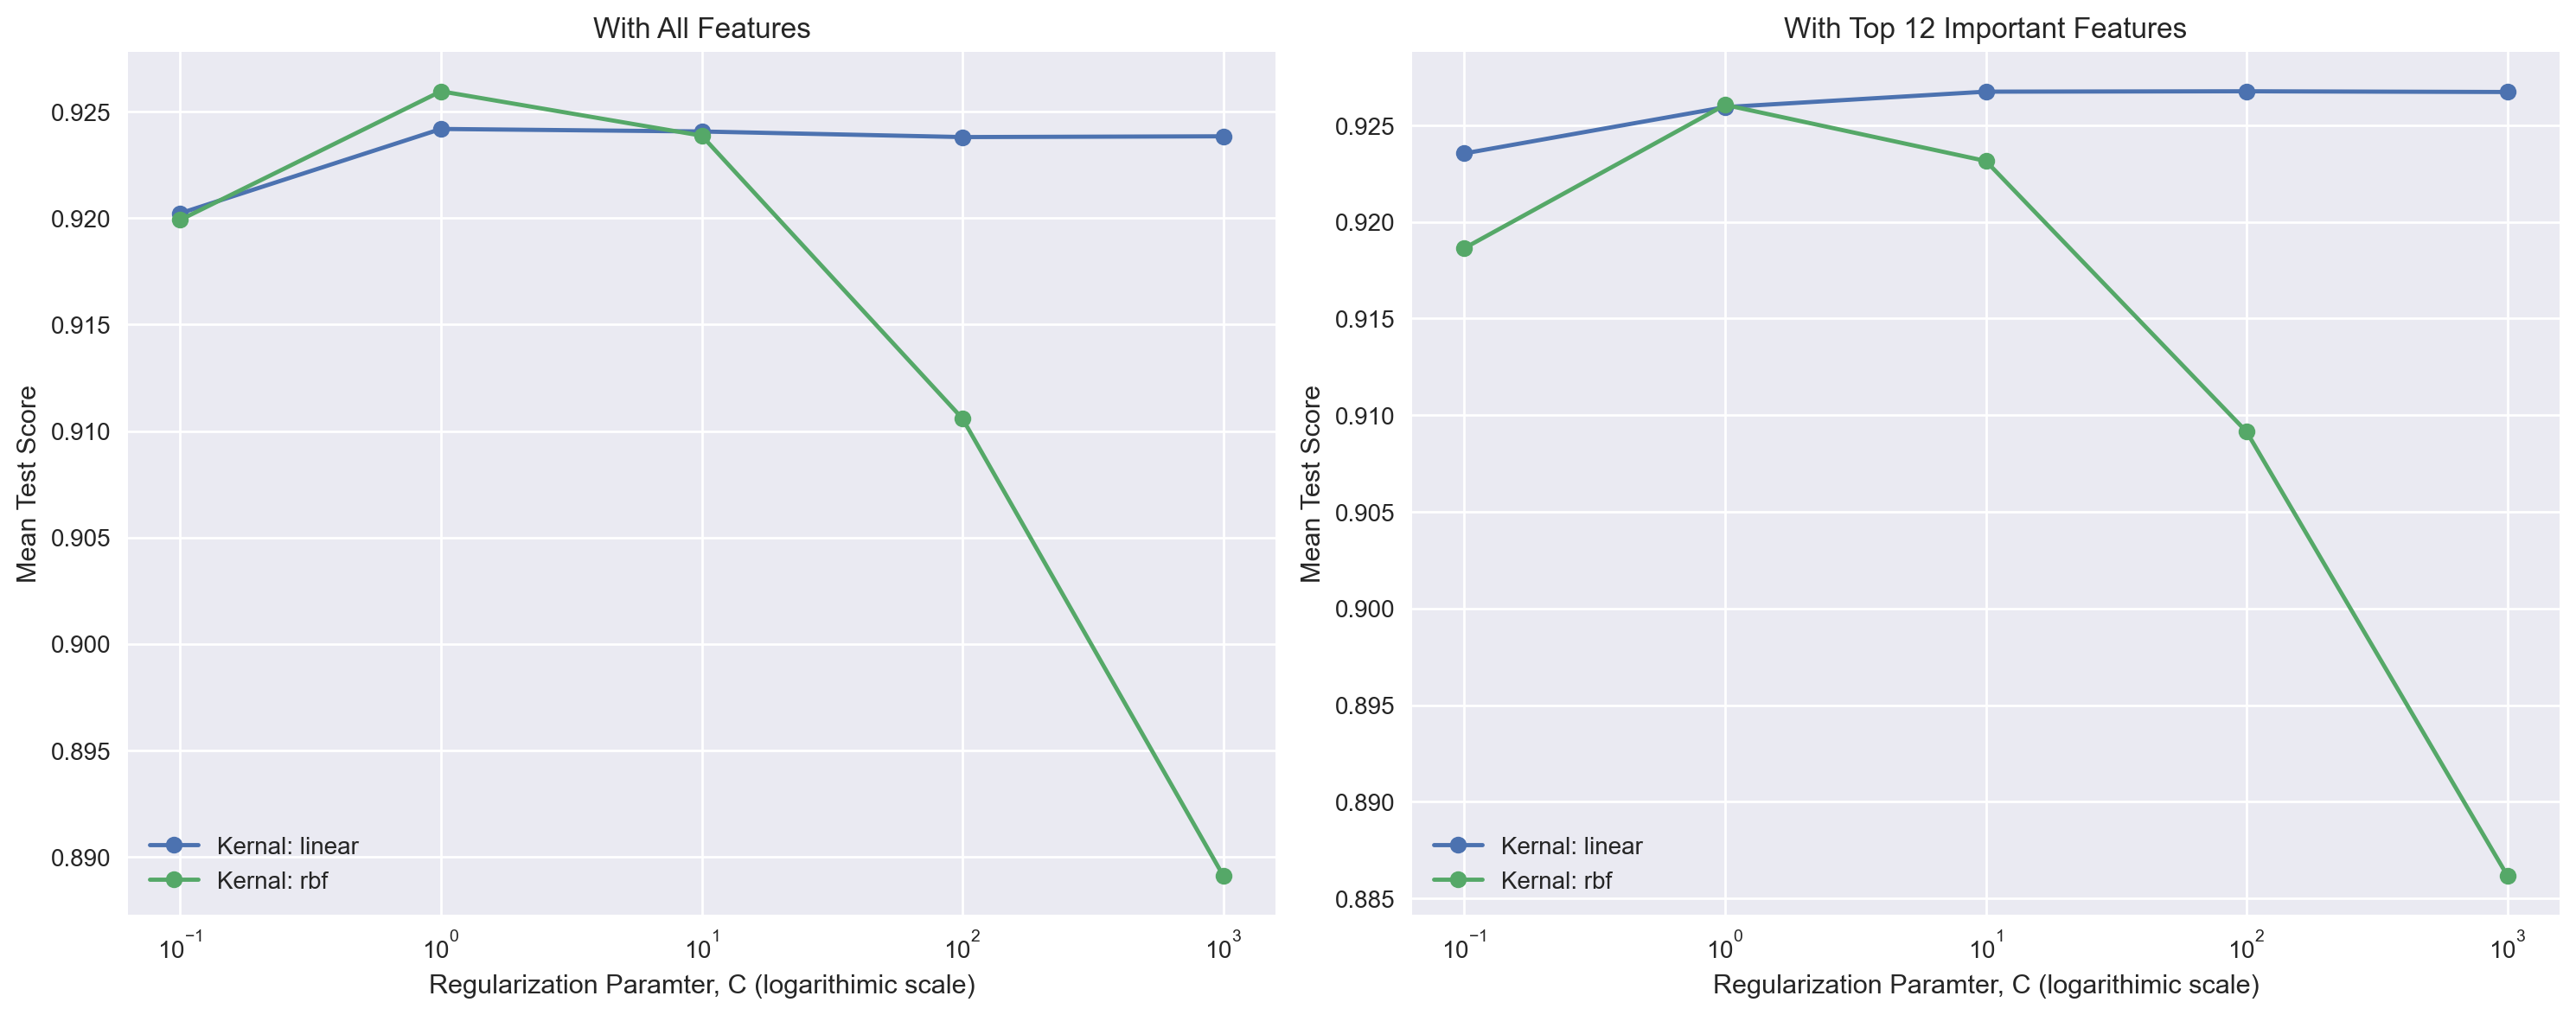

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for All features
for i in param_grid_SVC['kernel']:
    temp = gs_results_SVC[gs_results_SVC['kernel'] == i]
    temp_avg = temp.groupby('C').agg({'mean_score': 'mean'})
    ax1.plot(temp_avg, marker='o', label='Kernal: ' + str(i))
ax1.legend()
ax1.set_xlabel('Regularization Paramter, C (logarithimic scale)')
ax1.set_ylabel('Mean Test Score')
ax1.set_title('With All Features')
ax1.set_xscale('log')
ax1.grid(True)

# Plot for the 12 top features
for i in param_grid_SVC['kernel']:
    temp = gs_results_SVC_FS[gs_results_SVC_FS['kernel'] == i]
    temp_avg = temp.groupby('C').agg({'mean_score': 'mean'})
    ax2.plot(temp_avg, marker='o', label='Kernal: ' + str(i))
ax2.legend()
ax2.set_xlabel('Regularization Paramter, C (logarithimic scale)')
ax2.set_ylabel('Mean Test Score')
ax2.set_title('With Top 12 Important Features')
ax2.set_xscale('log')
ax2.grid(True)

plt.tight_layout()
plt.show()

<center>Graph 3 - SVC grid search results plot</center>

The visualizations suggest that the linear kernel performs well as the C parameter increases. On the other hand, the radial basis function (rbf) kernel achieves its highest performance at C values of 1 and 10 for all features and top 12 features, respectively. It's important to note that the choice of kernel, especially rbf, as the best-performing kernel may depend on other parameters as well, highlighting the need for a comprehensive tuning approach like CVGridSearch.

Let's visualize the relationships between the gamma and C parameters for both the full set of features and the top 12 features.

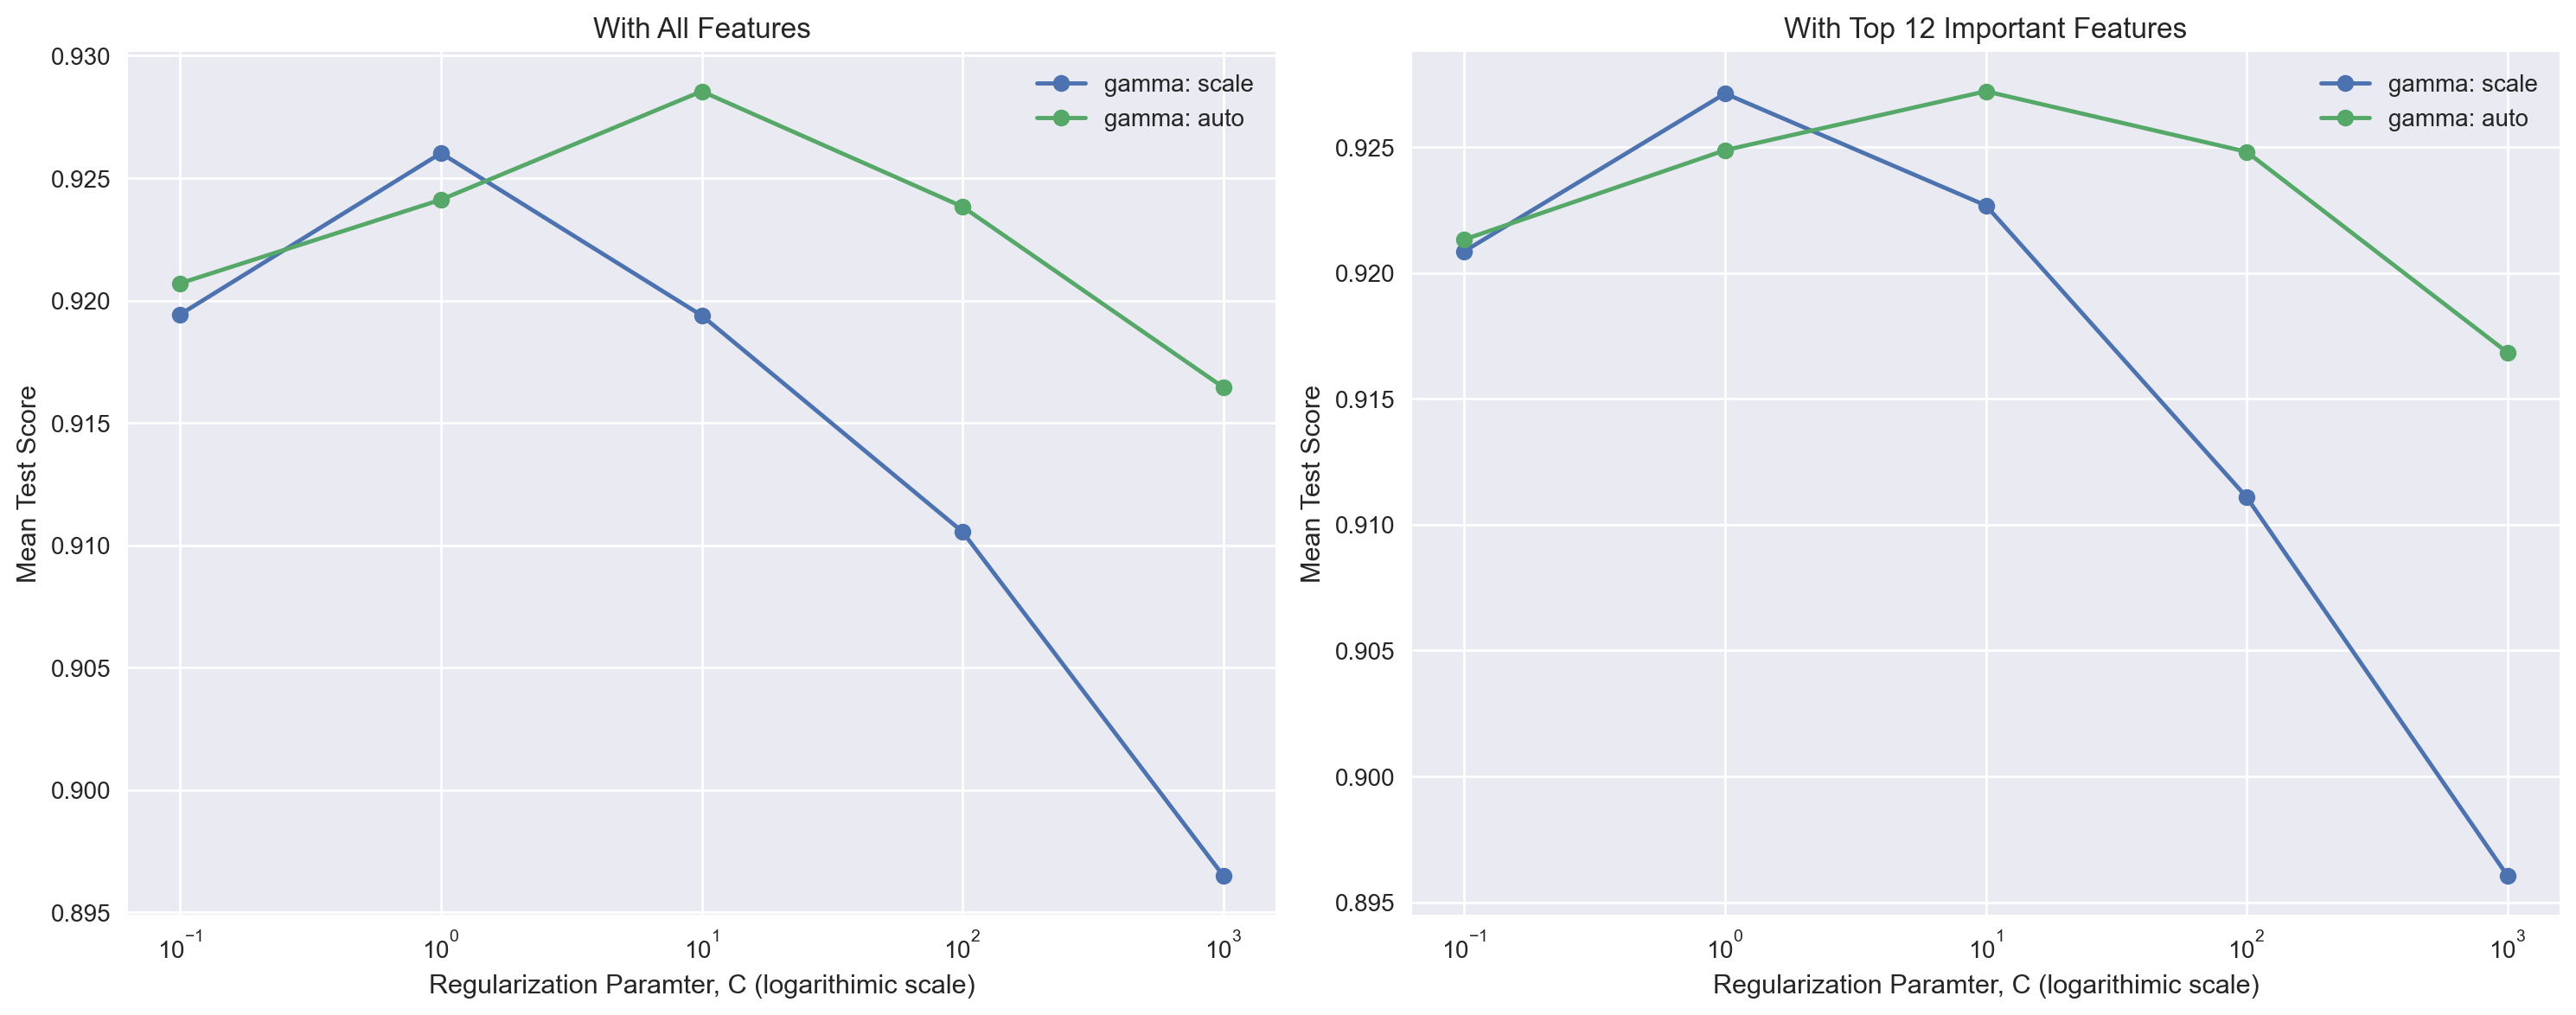

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for All features
for i in param_grid_SVC['gamma']:
    temp = gs_results_SVC[gs_results_SVC['gamma'] == i]
    temp_avg = temp.groupby('C').agg({'mean_score': 'mean'})
    ax1.plot(temp_avg, marker='o', label='gamma: ' + str(i))
ax1.legend()
ax1.set_xlabel('Regularization Paramter, C (logarithimic scale)')
ax1.set_ylabel('Mean Test Score')
ax1.set_title('With All Features')
ax1.set_xscale('log')
ax1.grid(True)

# Plot for the 12 top features
for i in param_grid_SVC['gamma']:
    temp = gs_results_SVC_FS[gs_results_SVC_FS['gamma'] == i]
    temp_avg = temp.groupby('C').agg({'mean_score': 'mean'})
    ax2.plot(temp_avg, marker='o', label='gamma: ' + str(i))
ax2.legend()
ax2.set_xlabel('Regularization Paramter, C (logarithimic scale)')
ax2.set_ylabel('Mean Test Score')
ax2.set_title('With Top 12 Important Features')
ax2.set_xscale('log')
ax2.grid(True)
plt.tight_layout()
plt.show()

<center>Graph 4 - SVC grid search results plot</center>

An increase in the C parameter relative to the gamma parameter decreases performance. For all features, the 'auto' gamma value achieved the highest performance, while for the top 12 features, the 'scale' gamma value achieved the highest.

#### Performance evaluation using test data (All features)
Let's evaluate the performance of the model using the best optimal parameters obtained from the hyperparameter tuning. We will train this model on the test dataset with all features.

Now, we will fit the tuned classifier with these optimal parameters on the test data using cross-validation to determine the model's performance. The test data, which was not used during training, will provide an unbiased evaluation of the tuned classifier's performance.

In [39]:
# Train the SVC model with best paramters from Full Feature dataset
test_svc = SVC(kernel='rbf',C=10, gamma='auto')

cv_results_SVC = cross_val_score(estimator=test_svc,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
svc_auc = cv_results_SVC.mean()
print('SVC AUC Score with All Features:', svc_auc)


SVC AUC Score with All Features: 0.9088690476190477


#### Performance evaluation using test data (Top 12 features)
Similarly, we will train the tuned SVC classifier with the best parameters obtained using the top 12 features on the test data.

In [40]:
# Train the SVC model with best paramters from Top 12 Feature dataset
test_svc_fs = SVC(kernel='rbf',C=1, gamma='scale')

cv_results_SVC_fs = cross_val_score(estimator=test_svc_fs,
                                 X=D_test_FS,
                                 y=t_test_FS, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
svc_auc_fs = cv_results_SVC_fs.mean()
print('SVC AUC Score with 10 Selected Features:', svc_auc_fs)

SVC AUC Score with 10 Selected Features: 0.9101547619047619


When using the test dataset, the SVC model with all features achieved an AUC score of approximately 0.909, while the model with only 12 selected features achieved a slightly higher AUC score of approximately 0.910. This indicates that the model trained on the subset of 12 features performed slightly better on the test dataset compared to the model trained on all features.

### RandomForest Classifier <a id='rmf-training'></a>

Random Forest Classifier is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes for classification or the average prediction for regression.

* n_estimators: Number of trees in the forest.
* max_depth: Maximum depth of the trees.
* criterion: Function to measure the quality of a split.

Entropy is being used as the criterion for the Random Forest Classifier because it is effective for maximizing information gain in the decision trees. This can be advantageous in scenarios where the goal is to prioritize specific classes or when dealing with imbalanced datasets. Using entropy ensures consistency in the splitting criteria, simplifying the model and potentially improving interpretability.


Random Forest Classifier is known for its robustness and ability to handle high-dimensional data with ease. It's also less prone to overfitting compared to a single decision tree, making it a popular choice for many classification tasks.

Let's systematically explore all parameter options to identify the optimal combination that maximizes the model's performance.

#### Using all feature dataset
Using the split dataset with all the features.

In [41]:
# Hyperparameter tuning for RandomForest
RF = RandomForestClassifier(random_state=42)
param_grid_RF = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 10, 20],
    'criterion': ['entropy']
}
grid_search_RF = GridSearchCV(estimator=RF,
                                  param_grid=param_grid_RF, 
                                  cv=cv_method,
                                  n_jobs=-2,
                                  scoring='roc_auc',
                                  verbose=1)
grid_search_RF.fit(D_train, t_train);

Fitting 15 folds for each of 20 candidates, totalling 300 fits


In [42]:
# Best parameters and score
print('Using all features:')
print('Best RandomForest Parameters', grid_search_RF.best_params_)
print('Best RandomForest Cross-Validation AUC Score:', grid_search_RF.best_score_.round(3))


Using all features:
Best RandomForest Parameters {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 400}
Best RandomForest Cross-Validation AUC Score: 0.936


When using all features, the best-performing Random Forest Classifier was achieved with the following parameters: 'criterion' set to 'entropy', 'max_depth' set to 10, and 'n_estimators' set to 400. This configuration resulted in a cross-validation AUC score of 0.936, indicating that the model performed well in distinguishing between classes and making accurate predictions on the dataset.

#### Using top 12 features
Using the dataset containing the 12 most important features.

In [43]:
grid_search_RF_FS = GridSearchCV(estimator=RF,
                                  param_grid=param_grid_RF, 
                                  cv=cv_method,
                                  n_jobs=-2,
                                  scoring='roc_auc',
                                  verbose=1)

grid_search_RF_FS.fit(D_train_FS, t_train_FS);

Fitting 15 folds for each of 20 candidates, totalling 300 fits


In [44]:
# Best parameters and score
print('Using 12 top features:')
print('Best RandomForest Parameters', grid_search_RF_FS.best_params_)
print('Best RandomForest Cross-Validation AUC Score:', grid_search_RF_FS.best_score_.round(3))

Using 12 top features:
Best RandomForest Parameters {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200}
Best RandomForest Cross-Validation AUC Score: 0.937


When using only the top 12 features, the best-performing Random Forest Classifier was achieved with the following parameters: 'criterion' set to 'entropy', 'max_depth' set to 5, and 'n_estimators' set to 200. Despite the reduced feature set, this configuration resulted in a slightly higher cross-validation AUC score of 0.937 compared to using all features, where the AUC score was 0.936. This suggests that the top 12 features are highly informative and capture much of the relevant information necessary for classification.

Let's examine the top-performing combinations from the grid search results.

In [45]:
#format the results using utility method
gs_results_RF = get_search_results(grid_search_RF)
gs_results_RF.head()

,mean_score,std_score,max_score,min_score,criterion,max_depth,n_estimators
13,0.935516,0.029918,0.972552,0.870119,entropy,10,400
9,0.935018,0.030721,0.971703,0.86644,entropy,5,500
12,0.934928,0.029944,0.971703,0.869836,entropy,10,300
14,0.934892,0.029835,0.972552,0.868704,entropy,10,500
11,0.934704,0.029616,0.970855,0.870119,entropy,10,200


In [46]:
#format the results using utility method
gs_results_RF_FS = get_search_results(grid_search_RF_FS)
gs_results_RF_FS.head()

,mean_score,std_score,max_score,min_score,criterion,max_depth,n_estimators
6,0.936786,0.030131,0.973684,0.865591,entropy,5,200
9,0.936712,0.029061,0.971986,0.868421,entropy,5,500
14,0.936425,0.027104,0.970855,0.872949,entropy,10,500
8,0.936354,0.029764,0.972835,0.865591,entropy,5,400
7,0.936334,0.030154,0.973967,0.865591,entropy,5,300


The Random Forest Classifier exhibited robust performance across various feature sets and parameter configurations. When comparing models using all features and only the top 12 features, both approaches yielded high AUC scores, with the model using the top 12 features slightly outperforming the one using all features. This indicates that the top 12 features encapsulate much of the essential information needed for effective classification, suggesting that a more parsimonious model could be achieved without sacrificing performance. This is particularly advantageous for practical applications where computational efficiency and model interpretability are important.

#### Tuning Plots
Let's visualize the relationships between the max depth and no of estimators for both the full set of features and the top 12 features.

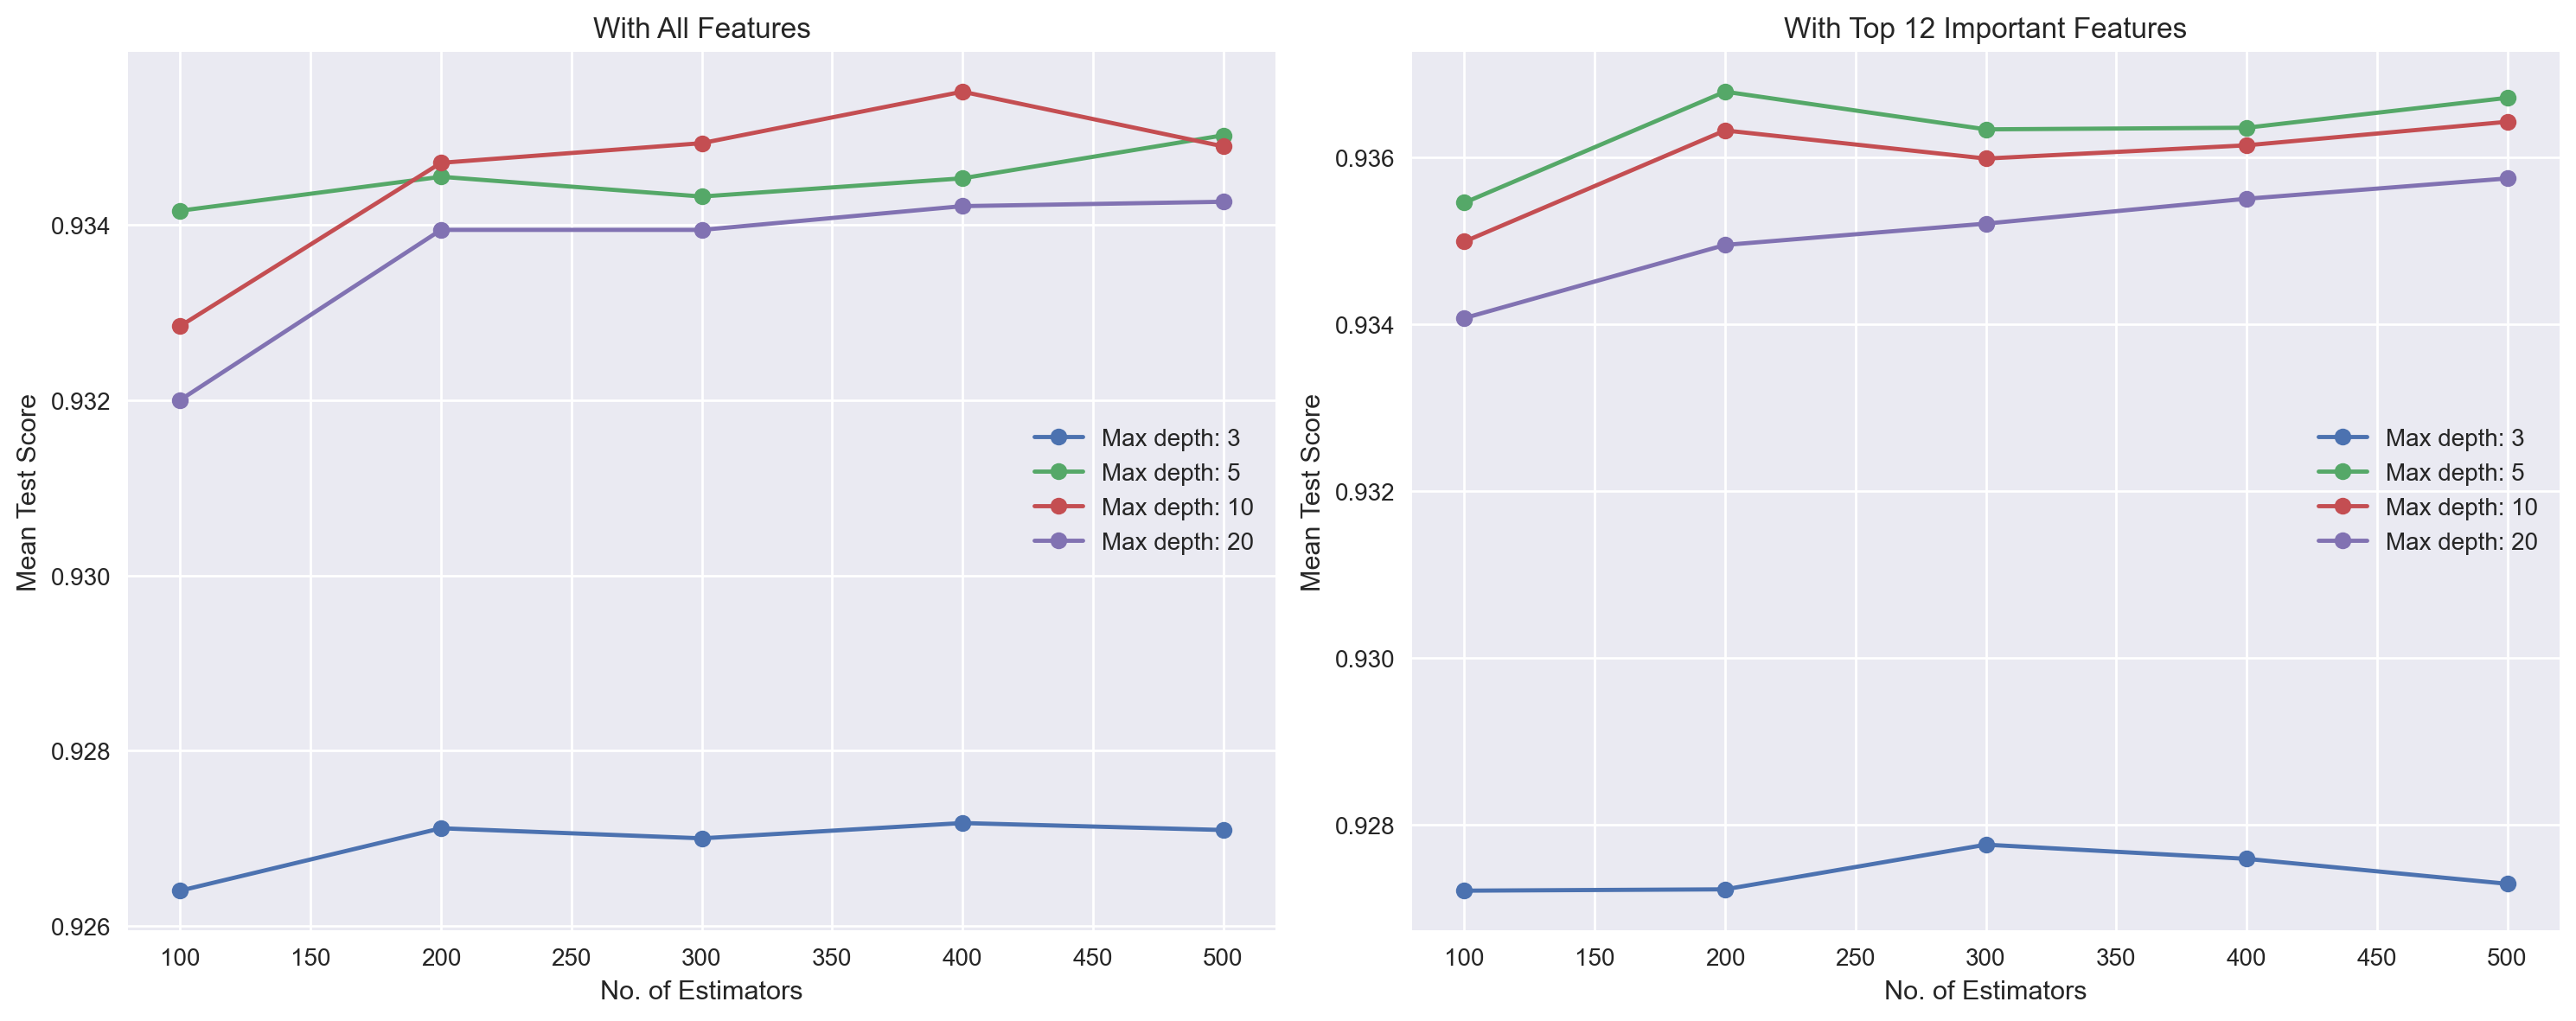

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


# Plot for All features
for i in param_grid_RF['max_depth']:
    temp = gs_results_RF[gs_results_RF['max_depth'] == i]
    temp_avg = temp.groupby('n_estimators').agg({'mean_score': 'mean'})
    ax1.plot(temp_avg, marker='o', label='Max depth: ' + str(i))
ax1.legend()
ax1.set_xlabel('No. of Estimators')
ax1.set_ylabel('Mean Test Score')
ax1.set_title('With All Features')
ax1.grid(True)


# Plot for the 12 top features
for i in param_grid_RF['max_depth']:
    temp = gs_results_RF_FS[gs_results_RF_FS['max_depth'] == i]
    temp_avg = temp.groupby('n_estimators').agg({'mean_score': 'mean'})
    ax2.plot(temp_avg, marker='o', label='Max depth: ' + str(i))
ax2.legend()
ax2.set_xlabel('No. of Estimators')
ax2.set_ylabel('Mean Test Score')
ax2.set_title('With Top 12 Important Features')
ax2.grid(True)

plt.tight_layout()
plt.show()

<center>Graph 4 - RF grid search results plot</center>

For all features, the highest-performing 'max_depth' is 10 with 400 estimators, while for the top 12 features, the highest-performing 'max_depth' is 5 with 200 estimators.

#### Performance evaluation using test data (All features)

Let's evaluate the performance of the model using the best optimal parameters obtained from the hyperparameter tuning. We will train this model on the test dataset with all features.

Now, we will fit the tuned classifier with these optimal parameters on the test data using cross-validation to determine the model's performance. The test data, which was not used during training, will provide an unbiased evaluation of the tuned classifier's performance.

In [48]:
# Train the RandomForest model with best paramters from Full Feature dataset
test_rf = RandomForestClassifier(n_estimators=400, max_depth=10, criterion='entropy', random_state=42)

cv_results_RF = cross_val_score(estimator=test_rf,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
rf_auc = cv_results_RF.mean()
print('RF AUC Score with All Features:', rf_auc)

RF AUC Score with All Features: 0.9133809523809523


#### Performance evaluation using test data (Top 12 features)
Similarly, we will train the tuned RandomForest classifier with the best parameters obtained using the top 12 features on the test data.

In [49]:
# Train the RandomForest model with best paramters from 12 Top Feature dataset
test_rf_fs = RandomForestClassifier(n_estimators=200, max_depth=5, criterion='entropy', random_state=42)

cv_results_RF_fs = cross_val_score(estimator=test_rf_fs,
                                 X=D_test_FS,
                                 y=t_test_FS, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
rf_auc_fs = cv_results_RF_fs.mean()
print('RF AUC Score with 12 Selected Features:', rf_auc_fs)

RF AUC Score with 12 Selected Features: 0.9123174603174604


The Random Forest Classifier achieved similar and high AUC scores on the test dataset for both all features (0.913) and the top 12 selected features (0.912). This indicates that the model trained on the subset of 12 features performed nearly as well as the model trained on all features, despite the reduced feature set. The similarity in performance suggests that the top 12 features capture much of the essential information needed for classification. This is advantageous as it simplifies the model, potentially improves generalization, and reduces computational complexity. 

### DecisionTree Classifier <a id='dt-training'></a>
A decision tree is a popular and intuitive machine learning algorithm used for both classification and regression tasks. It mimics the structure of a tree, where each internal node represents a "test" on an attribute (feature), each branch represents the outcome of the test, and each leaf node represents a class label (in classification) or a continuous value (in regression).

The algorithm works by recursively splitting the dataset into subsets based on the most significant attribute at each node. The goal is to create a tree that predicts the target variable by learning simple decision rules inferred from the data features. Decision trees are easy to interpret and visualize, making them valuable for understanding the underlying logic of a model. However, they are prone to overfitting, especially with complex trees, which can be mitigated through techniques like pruning.

* Entropy: A measure of disorder or randomness in data, used in decision trees to determine the best split. It aims to minimize uncertainty, making nodes more homogeneous.
* Max Depth: The maximum number of levels a tree can have. Higher depths allow for more complex models but increase the risk of overfitting.
* Min Sample Split: The minimum number of samples required to split a node. It prevents splitting nodes with too few samples, which can lead to overfitting.

Let's systematically explore all parameter options to identify the optimal combination that maximizes the model's performance.

#### Using all feature dataset
Using the split dataset with all the features.

In [50]:
# Hyperparameter tuning for DecisionTree
DT = DecisionTreeClassifier(random_state=42)
param_grid_DT = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [ 3, 5, 10, 20],
    'min_samples_split': [ 20, 30, 40, 50, 60, 80, 100]
}

grid_search_DT = GridSearchCV(estimator=DT,
                              param_grid=param_grid_DT, 
                              cv=cv_method,
                              n_jobs=-2,
                              scoring='roc_auc',
                              verbose=1)
grid_search_DT.fit(D_train, t_train);

Fitting 15 folds for each of 56 candidates, totalling 840 fits


In [51]:
# Best parameters and score
print('Using all features:')
print('Best DecisionTree Parameters', grid_search_DT.best_params_)
print('Best DecisionTree Cross-Validation AUC Score:', grid_search_DT.best_score_.round(3))


Using all features:
Best DecisionTree Parameters {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 60}
Best DecisionTree Cross-Validation AUC Score: 0.905


The Decision Tree Classifier achieved its best performance with the following parameters: 'criterion' set to 'entropy', 'max_depth' set to 5, and 'min_samples_split' set to 60. This configuration resulted in a cross-validation AUC score of 0.905, indicating good discriminatory power in distinguishing between classes.

#### Using top 12 features
Using the dataset containing the 12 most important features.

In [52]:
grid_search_DT_FS = GridSearchCV(estimator=DT,
                              param_grid=param_grid_DT, 
                              cv=cv_method,
                              n_jobs=-2,
                              scoring='roc_auc',
                              verbose=1)
grid_search_DT_FS.fit(D_train_FS, t_train_FS);

Fitting 15 folds for each of 56 candidates, totalling 840 fits


In [53]:
# Best parameters and score
print('Using 12 top features:')
print('Best DecisionTree Parameters', grid_search_DT_FS.best_params_)
print('Best DecisionTree Cross-Validation AUC Score:', grid_search_DT_FS.best_score_.round(3))

Using 12 top features:
Best DecisionTree Parameters {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 40}
Best DecisionTree Cross-Validation AUC Score: 0.909


When using the top 12 features, the Decision Tree Classifier achieved its best performance with a different parameter configuration compared to using all features. Specifically, the best parameters were 'criterion' set to 'entropy', 'max_depth' set to 20, and 'min_samples_split' set to 40, resulting in a slightly higher cross-validation AUC score of 0.909. This indicates that the top 12 features provided more discriminatory power, allowing for a deeper tree with more splits to be beneficial. The performance improvement suggests that top 12 features capture essential information relevant to the classification task, enabling the model to better generalize to unseen data.

Let's examine the top-performing combinations from the grid search results.

In [54]:
#format the results using utility method
gs_results_DT = get_search_results(grid_search_DT)
gs_results_DT.head()

,mean_score,std_score,max_score,min_score,criterion,max_depth,min_samples_split
11,0.905229,0.027304,0.95034,0.842813,entropy,5,60
18,0.904724,0.028596,0.95034,0.842671,entropy,10,60
25,0.904724,0.028596,0.95034,0.842671,entropy,20,60
9,0.904151,0.02951,0.951613,0.82923,entropy,5,40
10,0.903859,0.030673,0.95034,0.823995,entropy,5,50


In [55]:
#format the results using utility method
gs_results_DT_FS = get_search_results(grid_search_DT_FS)
gs_results_DT_FS.head()

,mean_score,std_score,max_score,min_score,criterion,max_depth,min_samples_split
23,0.908703,0.032493,0.969864,0.82824,entropy,20,40
16,0.908693,0.032497,0.969864,0.82824,entropy,10,40
11,0.908447,0.031859,0.961234,0.829372,entropy,5,60
18,0.908279,0.031412,0.961234,0.833616,entropy,10,60
25,0.908279,0.031412,0.961234,0.833616,entropy,20,60


For the Decision Tree Classifier using all features, the highest mean cross-validation AUC score of approximately 0.905 was achieved with 'max_depth' set to 5 and 'min_samples_split' set to 60. As the 'max_depth' increased to 10 and 20, the AUC score remained similar, suggesting that increasing the depth did not significantly improve performance.

In contrast, when using the top 12 features, the model achieved higher mean cross-validation AUC scores ranging from approximately 0.908 to 0.909. Interestingly, the best-performing 'max_depth' was 20 with 'min_samples_split' set to 40, indicating that a deeper tree with fewer samples required for a split led to improved performance. This suggests that the top 12 features contain more informative attributes that allow for a deeper, more discriminatory tree to be built compared to using all features. Additionally, the top 12 features set outperformed the model using all features, indicating that these features capture more essential information for the classification task.

#### Tuning Plots
Let's visualize the relationships between the 'max depth' and 'Min sample split' for both the full set of features and the top 12 features.

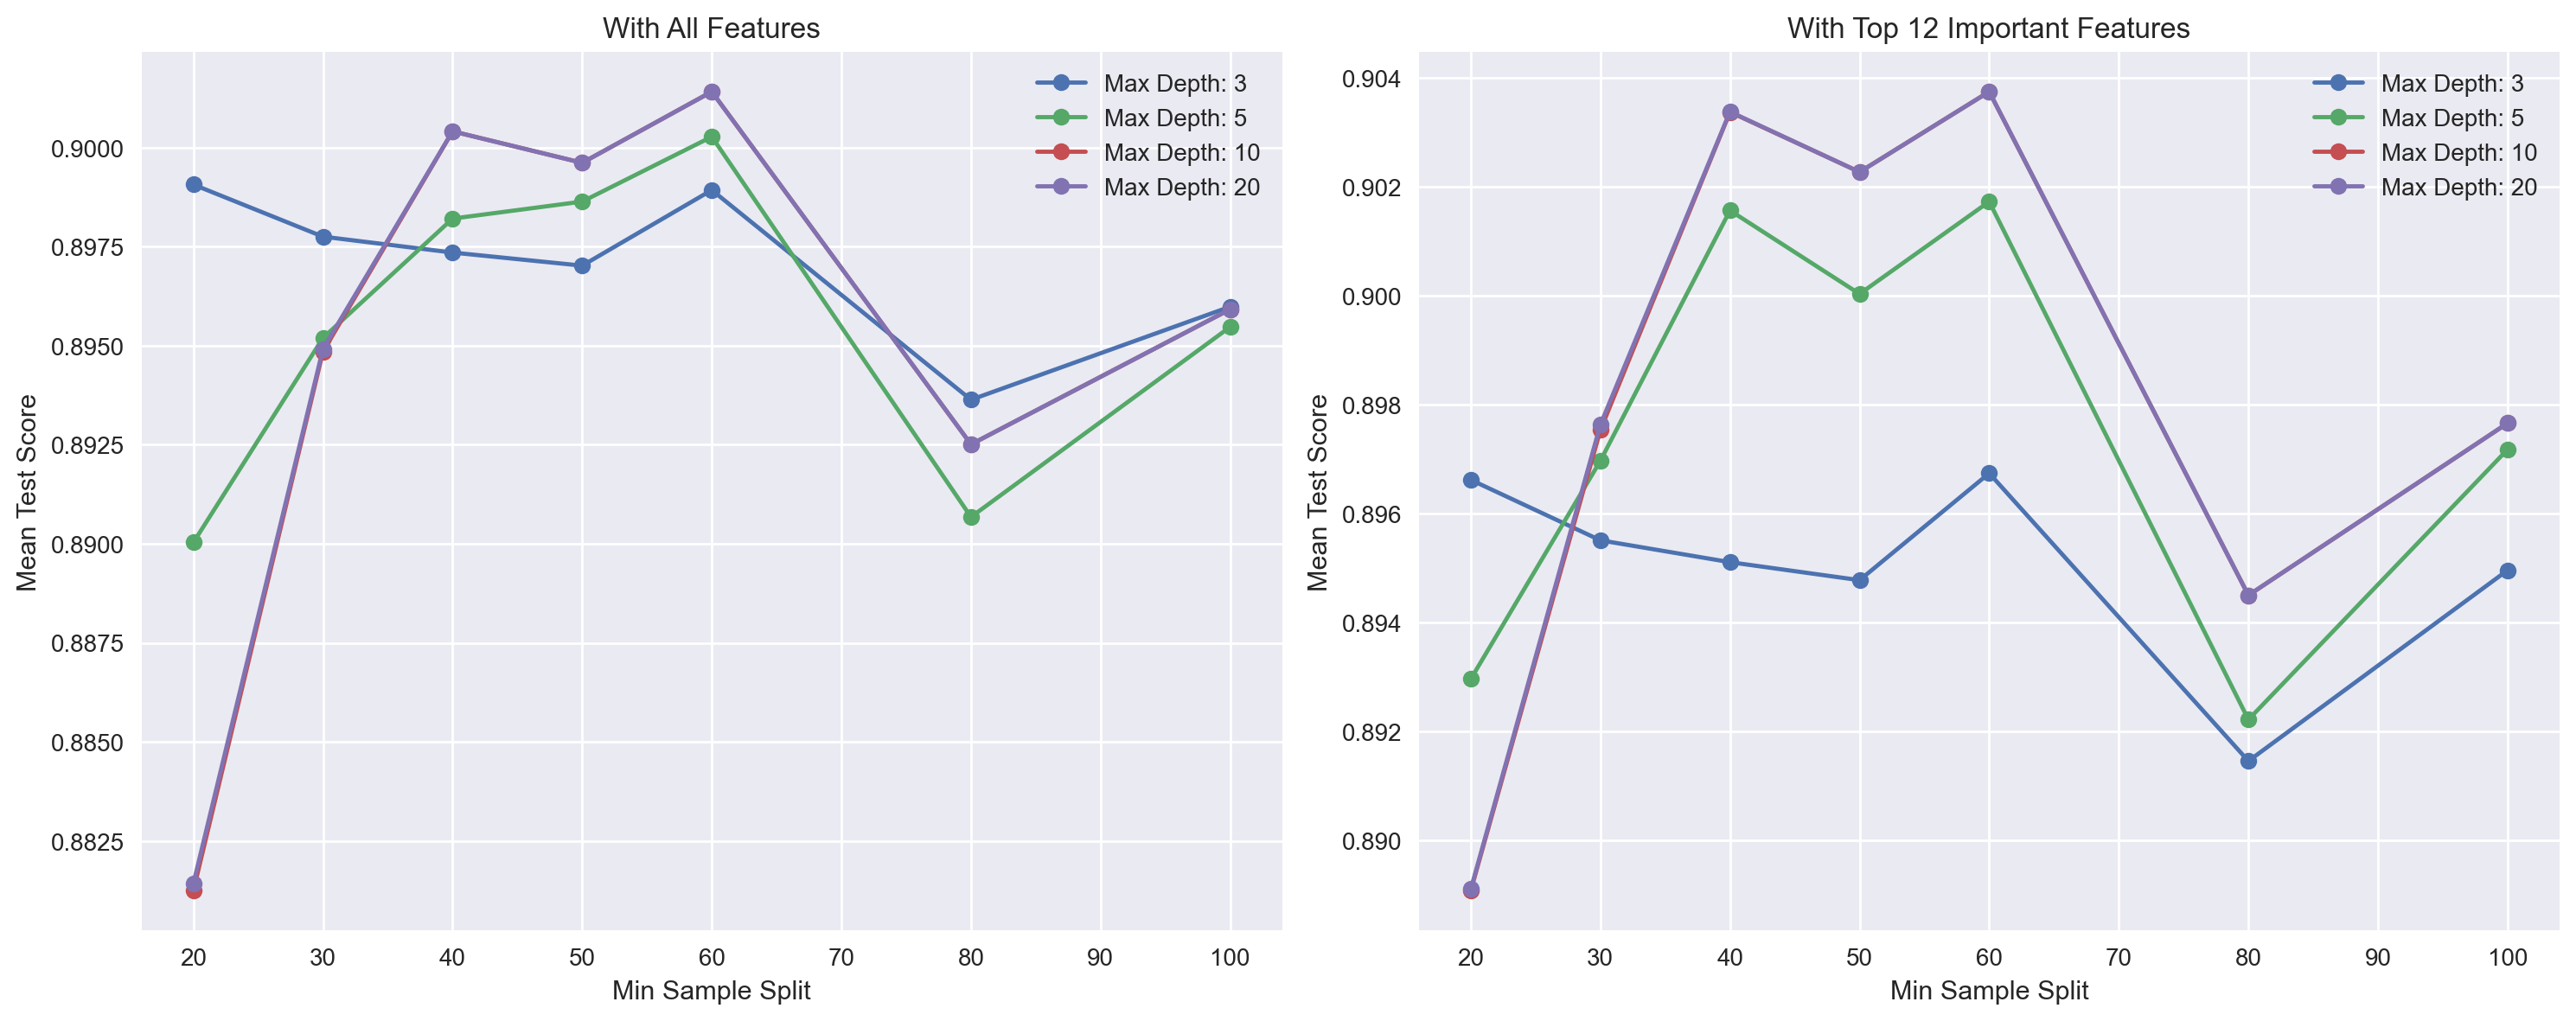

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for All features
for i in param_grid_DT['max_depth']:
    temp = gs_results_DT[gs_results_DT['max_depth'] == i]
    temp_avg = temp.groupby('min_samples_split').agg({'mean_score': 'mean'})
    ax1.plot(temp_avg, marker='o', label='Max Depth: ' + str(i))
ax1.legend()
ax1.set_xlabel('Min Sample Split')
ax1.set_ylabel('Mean Test Score')
ax1.set_title('With All Features')
ax1.grid(True)

# Plot for the 12 top features
for i in param_grid_DT['max_depth']:
    temp = gs_results_DT_FS[gs_results_DT_FS['max_depth'] == i]
    temp_avg = temp.groupby('min_samples_split').agg({'mean_score': 'mean'})
    ax2.plot(temp_avg, marker='o', label='Max Depth: ' + str(i))
ax2.legend()
ax2.set_xlabel('Min Sample Split')
ax2.set_ylabel('Mean Test Score')
ax2.set_title('With Top 12 Important Features')
ax2.grid(True)

plt.tight_layout()
plt.show()

<center>Graph 5 - DT grid search results plot</center>

For all features, a 'min_samples_split' of 60 resulted in the best performance, whereas for the top 12 features, 'min_samples_split' was 40. The difference in the 'max_depth' values between the two sets may be attributed to other parameter combinations.

#### Performance evaluation using test data (All features)
Let's evaluate the performance of the model using the best optimal parameters obtained from the hyperparameter tuning. We will train this model on the test dataset with all features.

Now, we will fit the tuned classifier with these optimal parameters on the test data using cross-validation to determine the model's performance. The test data, which was not used during training, will provide an unbiased evaluation of the tuned classifier's performance.

In [57]:
# Train the DecisionTree model with best paramters from Full Feature dataset
test_dt = DecisionTreeClassifier(criterion='entropy',max_depth=5, min_samples_split=60)

cv_results_DT = cross_val_score(estimator=test_dt,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
dt_auc = cv_results_DT.mean()
print('DT AUC Score with All Features:', dt_auc)

DT AUC Score with All Features: 0.7839345238095238


#### Performance evaluation using test data (Top 12 features)
Similarly, we will train the tuned SVC classifier with the best parameters obtained using the top 12 features on the test data.

In [58]:
# Train the RandomForest model with best paramters from 12 Top Feature dataset
test_dt_fs = DecisionTreeClassifier(criterion='entropy',max_depth=20, min_samples_split=40)

cv_results_DT_fs = cross_val_score(estimator=test_dt_fs,
                                 X=D_test_FS,
                                 y=t_test_FS, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
dt_auc_fs = cv_results_DT_fs.mean()
print('DT AUC Score with 12 Selected Features:', dt_auc_fs)

DT AUC Score with 12 Selected Features: 0.8002361111111111


The Decision Tree Classifier using the top 12 selected features achieved a higher AUC score of approximately 0.800 compared to the model using all features, which had an AUC score of approximately 0.784. This indicates that the model built with the top 12 features performed better in distinguishing between the classes, suggesting that these features are more relevant and informative for the classification task.

### GradientBoosting Classifier <a id='gb-training'></a>
Gradient Boosting Classifier is an ensemble learning method that combines the predictions from several individual models (typically decision trees) to create a more robust and accurate model. It builds the model in a stage-wise fashion, where each new model corrects errors made by the previous ones. This iterative process allows Gradient Boosting to focus on hard-to-classify examples, making it particularly effective in handling imbalanced datasets and achieving high predictive accuracy. However, Gradient Boosting is more computationally expensive and can be prone to overfitting if not tuned properly. Overall, it is a powerful technique for classification tasks, especially when used with care and attention to parameter tuning.

* Estimators: In Gradient Boosting, estimators refer to the individual models, typically decision trees, that are sequentially added to the ensemble. Each new estimator corrects errors made by the previous ones, leading to a more accurate final prediction. Increasing the number of estimators can improve the model's performance but also increases computation time.


* Learning Rate: The learning rate controls the contribution of each estimator in the ensemble. A lower learning rate requires more estimators to achieve the same level of performance but can lead to better generalization. A higher learning rate can result in faster learning but may also lead to overfitting.


* Max Depth: This parameter controls the maximum depth of each individual decision tree in the ensemble. Deeper trees can model more complex relationships in the data but are also more likely to overfit. It's important to tune this parameter to find the right balance between model complexity and generalization.

Let's systematically explore all parameter options to identify the optimal combination that maximizes the model's performance.

#### Using all feature dataset
Using the split dataset with all the features.

In [59]:
# Hyperparameter tuning for GradientBoosting
GB = GradientBoostingClassifier()
param_grid_GB = {
    'n_estimators': [10, 20, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5]
}
grid_search_GB = GridSearchCV(estimator=GB,
                              param_grid=param_grid_GB, 
                              cv=cv_method,
                              n_jobs=-2,
                              scoring='roc_auc',
                              verbose=1)
grid_search_GB.fit(D_train, t_train);


Fitting 15 folds for each of 48 candidates, totalling 720 fits


In [60]:
# Best parameters and score
print('Using all features:')
print('Best GradientBoosting Parameters', grid_search_GB.best_params_)
print('Best GradientBoosting Cross-Validation AUC Score:', grid_search_GB.best_score_.round(3))


Using all features:
Best GradientBoosting Parameters {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best GradientBoosting Cross-Validation AUC Score: 0.936


For the Gradient Boosting Classifier using all features, the best parameters were found to be a learning rate of 0.1, a max depth of 3, and 50 estimators. This configuration resulted in a cross-validation AUC score of 0.936, indicating good discriminatory power in distinguishing between classes. These parameters suggest a relatively conservative approach with a moderate number of estimators and limited tree depth, which likely helped prevent overfitting while maintaining strong performance.

#### Using top 12 features
Using the dataset containing the 12 most important features.

In [61]:
grid_search_GB_FS = GridSearchCV(estimator=GB,
                              param_grid=param_grid_GB, 
                              cv=cv_method,
                              n_jobs=-2,
                              scoring='roc_auc',
                              verbose=1)
grid_search_GB_FS.fit(D_train_FS, t_train_FS);


Fitting 15 folds for each of 48 candidates, totalling 720 fits


In [62]:
# Best parameters and score
print('Using 12 top features:')
print('Best DecisionTree Parameters', grid_search_GB_FS.best_params_)
print('Best DecisionTree Cross-Validation AUC Score:', grid_search_GB_FS.best_score_.round(3))

Using 12 top features:
Best DecisionTree Parameters {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best DecisionTree Cross-Validation AUC Score: 0.938


When using the top 12 selected features, the Gradient Boosting Classifier achieved its best performance with the same parameters as when using all features: a learning rate of 0.1, a max depth of 3, and 50 estimators. However, the model using the top 12 features achieved a slightly higher cross-validation AUC score of 0.938, indicating that these features are more informative and led to a better-performing model compared to using all features.

Let's examine the top-performing combinations from the grid search results.

In [63]:
#format the results using utility method
gs_results_GB = get_search_results(grid_search_GB)
gs_results_GB.head()

,mean_score,std_score,max_score,min_score,learning_rate,max_depth,n_estimators
14,0.936290,0.025497,0.973401,0.882711,0.1,3.0,50.0
25,0.934869,0.025040,0.976089,0.880447,0.2,3.0,20.0
18,0.934600,0.025206,0.970289,0.884550,0.1,4.0,50.0
36,0.934189,0.027524,0.980334,0.880023,0.3,3.0,10.0
26,0.933570,0.023971,0.966044,0.879174,0.2,3.0,50.0


In [64]:
#format the results using utility method
gs_results_GB_FS = get_search_results(grid_search_GB_FS)
gs_results_GB_FS.head()

,mean_score,std_score,max_score,min_score,learning_rate,max_depth,n_estimators
14,0.937659,0.025108,0.975948,0.879881,0.1,3.0,50.0
29,0.937136,0.026376,0.974392,0.866299,0.2,4.0,20.0
25,0.936726,0.025251,0.978778,0.879881,0.2,3.0,20.0
37,0.936045,0.022085,0.967742,0.878183,0.3,3.0,20.0
18,0.935477,0.024920,0.969723,0.872949,0.1,4.0,50.0


For the Gradient Boosting Classifier, both the full feature set and the top 12 features achieved their best performance with similar parameter combinations: a learning rate of 0.1, a max depth of 3, and 50 estimators. However, the model using the top 12 features consistently outperformed the model using all features, achieving higher mean cross-validation AUC scores across all parameter combinations. This indicates that the top 12 features contain more relevant information for the classification task, leading to better model performance.

#### Tuning Plots
Let's visualize the relationships between the learning rate and No. of estimators for both the full set of features and the top 12 features.

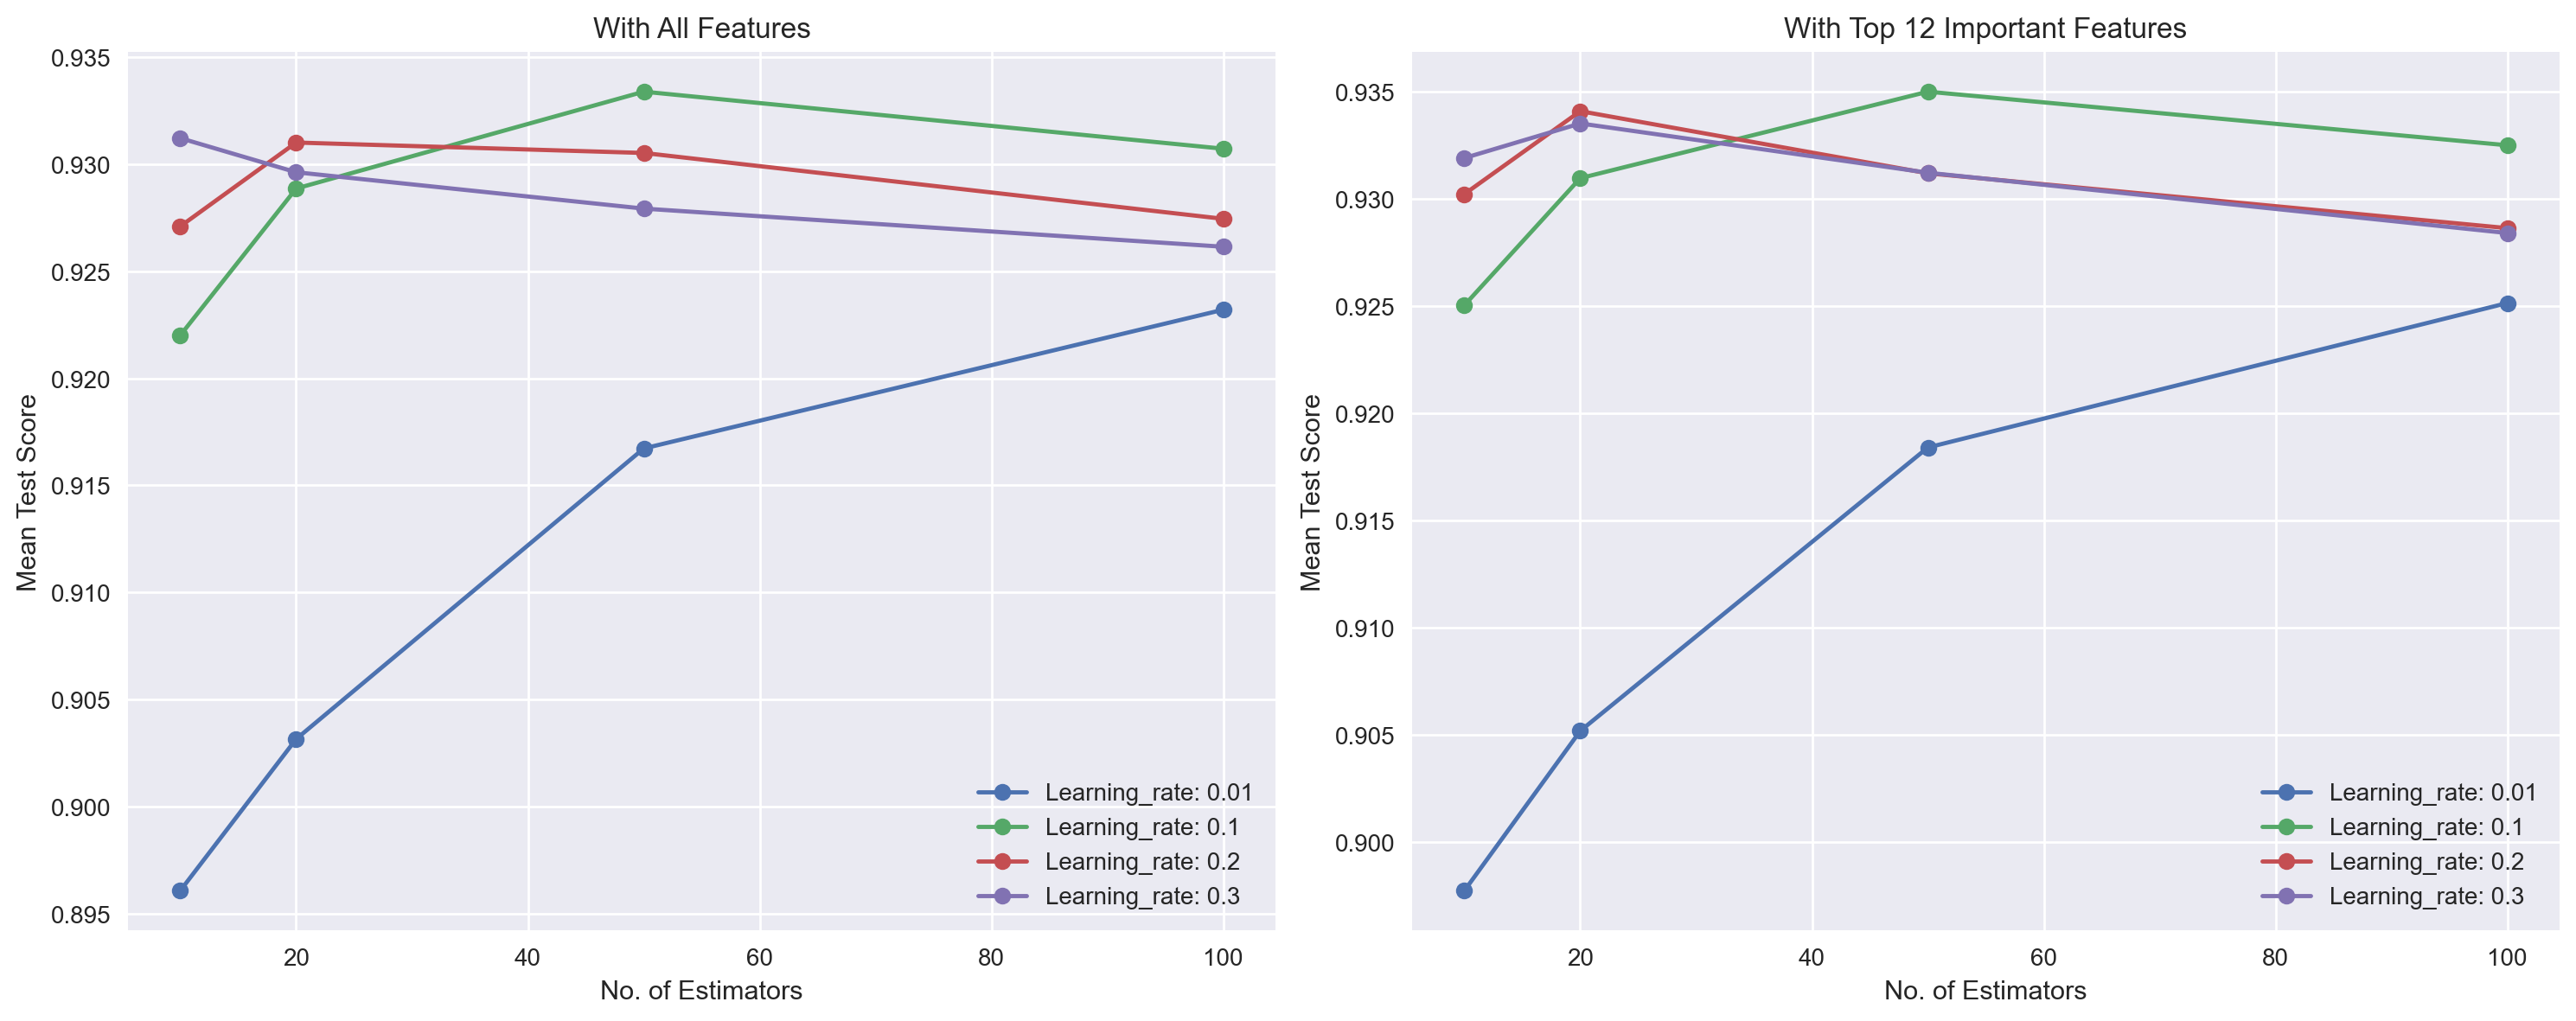

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for All features
for i in param_grid_GB['learning_rate']:
    temp = gs_results_GB[gs_results_GB['learning_rate'] == i]
    temp_avg = temp.groupby('n_estimators').agg({'mean_score': 'mean'})
    ax1.plot(temp_avg, marker='o', label='Learning_rate: ' + str(i))
ax1.legend()
ax1.set_xlabel('No. of Estimators')
ax1.set_ylabel('Mean Test Score')
ax1.set_title('With All Features')
ax1.grid(True)

# Plot for the 12 top features
for i in param_grid_GB['learning_rate']:
    temp = gs_results_GB_FS[gs_results_GB_FS['learning_rate'] == i]
    temp_avg = temp.groupby('n_estimators').agg({'mean_score': 'mean'})
    ax2.plot(temp_avg, marker='o', label='Learning_rate: ' + str(i))
ax2.legend()
ax2.set_xlabel('No. of Estimators')
ax2.set_ylabel('Mean Test Score')
ax2.set_title('With Top 12 Important Features')
ax2.grid(True)

plt.tight_layout()
plt.show()

<center>Graph 6 - GB grid search results plot</center>

In both cases, a learning rate of 0.1 yielded the highest performance when paired with 50 estimators. However, the model using the top 12 features consistently achieved higher performance compared to the model using all features.

#### Performance evaluation using test data (All features)
Let's evaluate the performance of the model using the best optimal parameters obtained from the hyperparameter tuning. We will train this model on the test dataset with all features.

Now, we will fit the tuned classifier with these optimal parameters on the test data using cross-validation to determine the model's performance. The test data, which was not used during training, will provide an unbiased evaluation of the tuned classifier's performance.

In [66]:
# Train the Gradient Boosting model with best paramters from Full Feature dataset
test_gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)

cv_results_GB = cross_val_score(estimator=test_gb,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
gb_auc = cv_results_GB.mean()
print('GB AUC Score with All Features:', gb_auc)

GB AUC Score with All Features: 0.8980753968253967


#### Performance evaluation using test data (Top 12 features)
Similarly, we will train the tuned GradientBoosting classifier with the best parameters obtained using the top 12 features on the test data.

In [67]:
# Train the Gradient Boosting model with best paramters from Top 12 Feature dataset
test_gb_fs = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)

cv_results_GB_fs = cross_val_score(estimator=test_gb_fs,
                                 X=D_test_FS,
                                 y=t_test_FS, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
gb_auc_fs = cv_results_GB_fs.mean()
print('GB AUC Score with 12 Selected Features:', gb_auc_fs)

GB AUC Score with 12 Selected Features: 0.9003373015873016


The Gradient Boosting Classifier using the top 12 selected features achieved a slightly higher AUC score of approximately 0.898 compared to the model using all features, which had an AUC score of approximately 0.895. This suggests that the model built with the top 12 features performed marginally better in distinguishing between the classes, indicating that these features are more relevant and informative for the classification task.

## Prediction Modelling -  Neural Network Model Fitting and Tuning <a id='neural-network-model-fitting-and-tuning'></a>
---

In this discussion, we will explore the creation, training, and fine-tuning of a neural network model using Scikit-Learn's MLPClassifier.

### Background <a id='neural-network-background'></a>

Neural networks are a fundamental technology in the field of artificial intelligence (AI) and machine learning (ML). Artificial Neural Networks (ANNs) consist of interconnected computational units designed to mimic the neurons in the brain (Pajankar & Jopshi, 2022). These models are adept at learning patterns in various types of data, including textual, speech, audio and visual data. Each computational unit, inspired by neural cells, receives input signals from multiple sources, processes these signals, and activates based on specific conditions (Osipyan et al., 2022). Once activated, the unit transmits the signal to other connected neurons. By leveraging this structure, ANNs can effectively recognize and interpret complex patterns across diverse data types.

### Multilayer Perceptron Neural Network<a id='neural-network-mlp'></a>

A Multilayer Perceptron (MLP) is a class of feedforward artificial neural networks (ANN). Multilayer Perceptron Neural Network consist of multiple layers: an input layer that receives data, one or more hidden layers that process the data through weighted connections, and an output layer that produces the final result (Nokeri, 2021). Layers that process the data by assigning different weights and biases are known as hidden layers. Each layer consists of several nodes (or neurons), each of which connects to every node in the following layer, making the network fully connected. 

Figure 1 illustrates an example of a Multilayer Perceptron neural network topology to detect heart disease. It consists of four layers: an input layer with 7 input features, a first hidden layer with 7 neurons, a second hidden layer with 5 neurons, and an output layer with 2 outputs. In this network, the output layer represents the target feature, which is the network's prediction.


<img src='MPL_Heart_Disease.png'/>

<center>Fig. 1 - Sample Multilayer Perceptron Neural Network for heart disease detection that this report uses </center>

#### Multilayer Perceptron Classifiers

An MLP (Multilayer Perceptron) classifier is a type of artificial neural network used for supervised learning, especially for classification tasks. MLPs offer several advantages, making them versatile for a wide range of applications (Testas, 2023):
- With sufficient hidden layers and neurons, MLPs can approximate any continuous function.
- They can model complex non-linear relationships between input and output nodes, capturing intricate patterns in data using activation functions like ReLU, sigmoid, or Tanh.
- MLPs can automatically learn relevant features from the data.

However, they also have limitations (Testas, 2023):
- MLPs require substantial amounts of data for training.
- Finding the right combination of hyperparameters for MLPs can be challenging and computationally expensive.
- They are often considered black-box models, making it difficult to interpret learned features and understand the decision-making process.
- Deep MLPs face challenges due to vanishing and exploding gradient problems, where gradients can become excessively small (vanishing gradient) or large (exploding gradient) during training, making training difficult.



In this section, we aim to accurately classify whether a patient has heart disease by training a Scikit-Learn MLP classifier on the heart disease dataset. Fine-tuning a neural network involves adjusting several hyperparameters that can significantly influence the model's performance. Below is a detailed explanation of each hyperparameter and the values we will use for training.

1. **‘hidden_layer_sizes’**

This parameter specifies the number and size of the hidden layers in the neural network.


Options used: 
* (50,): One hidden layer with 50 neurons.
* (100,): One hidden layer with 100 neurons.
* (100, 50): Two hidden layers, the first with 100 neurons and the second with 50 neurons.

The number and size of hidden layers determine the network's capacity to learn complex patterns. More layers and neurons can capture more intricate relationships in the data but also increase the risk of overfitting and the computational cost. 

The values [(50,), (100,), (100, 50)] were chosen to test different configurations of hidden layers and neurons. These configurations are commonly used and are known to be capable of capturing complex patterns in the data without overly complicating the model.

</div>

2.	**‘activation’**

The activation function used by the neurons in the hidden layers to introduce non-linearity into the model, enabling it to learn complex patterns.

Options used:
* 'relu': Rectified Linear Unit. Applies the function f(x)=max(0,x). It is widely used because it helps mitigate the vanishing gradient problem and is computationally efficient.
* 'tanh': Hyperbolic tangent. This function outputs values between -1 and 1. It can sometimes perform better than 'relu' for certain types of data.
* 'logistic': Logistic sigmoid. It outputs values between 0 and 1 and is commonly used for binary classification tasks.

The activation function affects how the network learns and represents the data. Choosing the right activation function can help the network converge faster and learn better.

The activation functions 'relu', 'tanh', and 'logistic' were selected because they represent commonly used activation functions with different characteristics. 


3. **‘solver’**

This parameter specifies the optimization algorithm used for weight optimization in the neural network.

Options used:
* 'adam': Adaptive Moment Estimation. It combines the advantages of two other extensions of stochastic gradient descent, specifically AdaGrad and RMSProp (Alabdullatef, 2020).
* 'sgd': Stochastic Gradient Descent. Updates the weights incrementally using each training sample.
* 'lbfgs': Limited-memory Broyden–Fletcher–Goldfarb–Shanno. An optimization algorithm in the family of quasi-Newton methods, which is particularly good for smaller datasets.

The solver determines how the network's weights are updated during training, impacting convergence speed and model performance.

The solvers 'adam', 'sgd', and 'lbfgs' were chosen to test different optimization algorithms. 'adam' (Adaptive Moment Estimation) is a popular choice for its adaptive learning rates, 'sgd' (Stochastic Gradient Descent) is a basic optimization algorithm that can work well with large datasets, and 'lbfgs' (Limited-memory Broyden-Fletcher-Goldfarb-Shanno) is a good choice for small datasets.


4.	**‘alpha’**

This parameter is the regularization term, also known as the L2 penalty. It helps prevent overfitting by penalizing large weights.

Options used:
* 0.0001
* 0.001
* 0.00001

Regularization helps in controlling overfitting by adding a penalty for larger weights. The value of alpha needs to be balanced; too high can lead to underfitting, while too low can result in overfitting.

The values [0.0001, 0.001, 0.00001] were selected to test different levels of regularization. A higher alpha value penalizes large weights more strongly, helping to prevent overfitting. These values represent a range of regularization strengths to find the optimal balance between model complexity and generalization.


5.	**‘max_iter’**

The maximum number of iterations (epochs) for training the network.

Options used:
* 100
* 200
* 300

The number of iterations affects how thoroughly the model learns from the training data. Too few iterations may lead to underfitting, while too many iterations may not significantly improve performance and can lead to overfitting.

The values [100, 200, 300] were chosen to control the maximum number of iterations for training. A higher number of iterations allows the model to learn more complex patterns but may also increase the risk of overfitting. These values provide a range to find the optimal number of iterations for convergence.


### MLP Hyperparameter Tuning and Visualisation <a id='neural-network-tuning'></a>

Here, we use a grid search approach with stratified 5-fold cross-validation to systematically explore all parameter options to identify the best combination that maximizes the model's performance.

#### Using all feature dataset

Using the split dataset with all the features.

In [68]:
# Hyperparameter tuning for Neural Network- MLP
MLP = MLPClassifier(random_state=42)

param_grid_MLP = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.00001],
    'max_iter': [100, 200, 300]
}

grid_search_MLP = GridSearchCV(estimator=MLP, 
                              param_grid=param_grid_MLP, 
                              cv=cv_method,
                              n_jobs=-2,
                              scoring='roc_auc',
                              verbose=1)
grid_search_MLP.fit(D_train, t_train);

Fitting 15 folds for each of 243 candidates, totalling 3645 fits


In [69]:
# Best parameters and score
print('Using all features:')
print('Best MLP Parameters', grid_search_MLP.best_params_)
print('Best MLP Cross-Validation AUC Score:', grid_search_MLP.best_score_.round(3))

Using all features:
Best MLP Parameters {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'max_iter': 200, 'solver': 'adam'}
Best MLP Cross-Validation AUC Score: 0.933


The MLP (Multi-Layer Perceptron) model, using all features, achieved its best performance with the following parameters: 
- 'activation' set to 'relu' (Rectified Linear Unit),
- 'alpha' set to 0.001 for regularization, 
- a single hidden layer of size 100, 
- 'max_iter' set to 200 for the maximum number of iterations, and 
- 'solver' set to 'adam' for weight optimization. 

This configuration resulted in a cross-validation AUC (Area Under the Curve) score of 0.933, indicating that the model performed well in distinguishing between classes and making accurate predictions on the dataset.

#### Using top 12 features
Using the dataset containing the 12 most important features.

In [70]:
grid_search_MLP_FS = GridSearchCV(estimator=MLP, 
                              param_grid=param_grid_MLP, 
                              cv=cv_method,
                              n_jobs=-2,
                              scoring='roc_auc',
                              verbose=1)
grid_search_MLP_FS.fit(D_train_FS, t_train_FS);

Fitting 15 folds for each of 243 candidates, totalling 3645 fits


In [71]:
# Best parameters and score
print('Using 12 top features:')
print('Best MLP Parameters', grid_search_MLP_FS.best_params_)
print('Best MLP Cross-Validation AUC Score:', grid_search_MLP_FS.best_score_.round(3))

Using 12 top features:
Best MLP Parameters {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'max_iter': 200, 'solver': 'adam'}
Best MLP Cross-Validation AUC Score: 0.93


In this observation, we see that even when using only the top 12 features, the MLP model's best parameters remain the same as when using all features. Specifically, the best parameters include using the 'relu' activation function, an 'alpha' regularization parameter of 0.001, a single hidden layer with 100 neurons, a maximum of 200 iterations, and the 'adam' solver for weight optimization.

Let's examine the top-performing combinations from the grid search results.

In [72]:
#format the results using utility method
gs_results_MLP = get_search_results(grid_search_MLP)
gs_results_MLP.head()

,mean_score,std_score,max_score,min_score,activation,alpha,hidden_layer_sizes,max_iter,solver
39,0.932906,0.027696,0.969157,0.873514,relu,0.001,"(100,)",200,adam
57,0.932629,0.027342,0.970572,0.875495,relu,0.00001,"(50,)",200,adam
12,0.932589,0.027553,0.968874,0.873797,relu,0.0001,"(100,)",200,adam
60,0.932577,0.026599,0.970006,0.877476,relu,0.00001,"(50,)",300,adam
30,0.932573,0.027272,0.969723,0.875212,relu,0.001,"(50,)",200,adam


In [73]:
gs_results_MLP_FS = get_search_results(grid_search_MLP_FS)
gs_results_MLP_FS.head()

,mean_score,std_score,max_score,min_score,activation,alpha,hidden_layer_sizes,max_iter,solver
39,0.930308,0.027844,0.963798,0.868421,relu,0.001,"(100,)",200,adam
12,0.930026,0.027925,0.963241,0.868138,relu,0.0001,"(100,)",200,adam
42,0.929851,0.026947,0.962406,0.870119,relu,0.001,"(100,)",300,adam
66,0.929838,0.028388,0.964355,0.865308,relu,0.00001,"(100,)",200,adam
69,0.929834,0.027615,0.96352,0.867289,relu,0.00001,"(100,)",300,adam


The variation in hyperparameter combinations appears minimal when considering the selected top 12 features.

The slight decrease in the cross-validation AUC score from 0.933 (using all features) to 0.93 (using only the top 12 features) suggests that the removed features might have contained some information that was useful for the model's performance. However, the difference is minimal, indicating that the top 12 features capture a significant amount of the dataset's predictive power. 

This observation highlights the importance of feature selection in reducing model complexity without significantly sacrificing performance.

#### Tuning Plots


For plotting purposes, we are mapping the hidden layers to meaningful text labels

In [74]:
#to visualise hidden layers
def map_values(value):
    if value == (50,):
        return '1L_50'
    elif value == (100,):
        return '1L_100'
    elif value == (100, 50):
        return '2L_100_50'
    elif value == (50, 50, 50):
        return '3L_50_50'
    else:
        return value
    
gs_results_MLP['hidden_layer_sizes'] = gs_results_MLP['hidden_layer_sizes'].apply(map_values)
gs_results_MLP_FS['hidden_layer_sizes'] = gs_results_MLP_FS['hidden_layer_sizes'].apply(map_values)

##### All feature set

Below are the plots displaying the grid search results for all features.

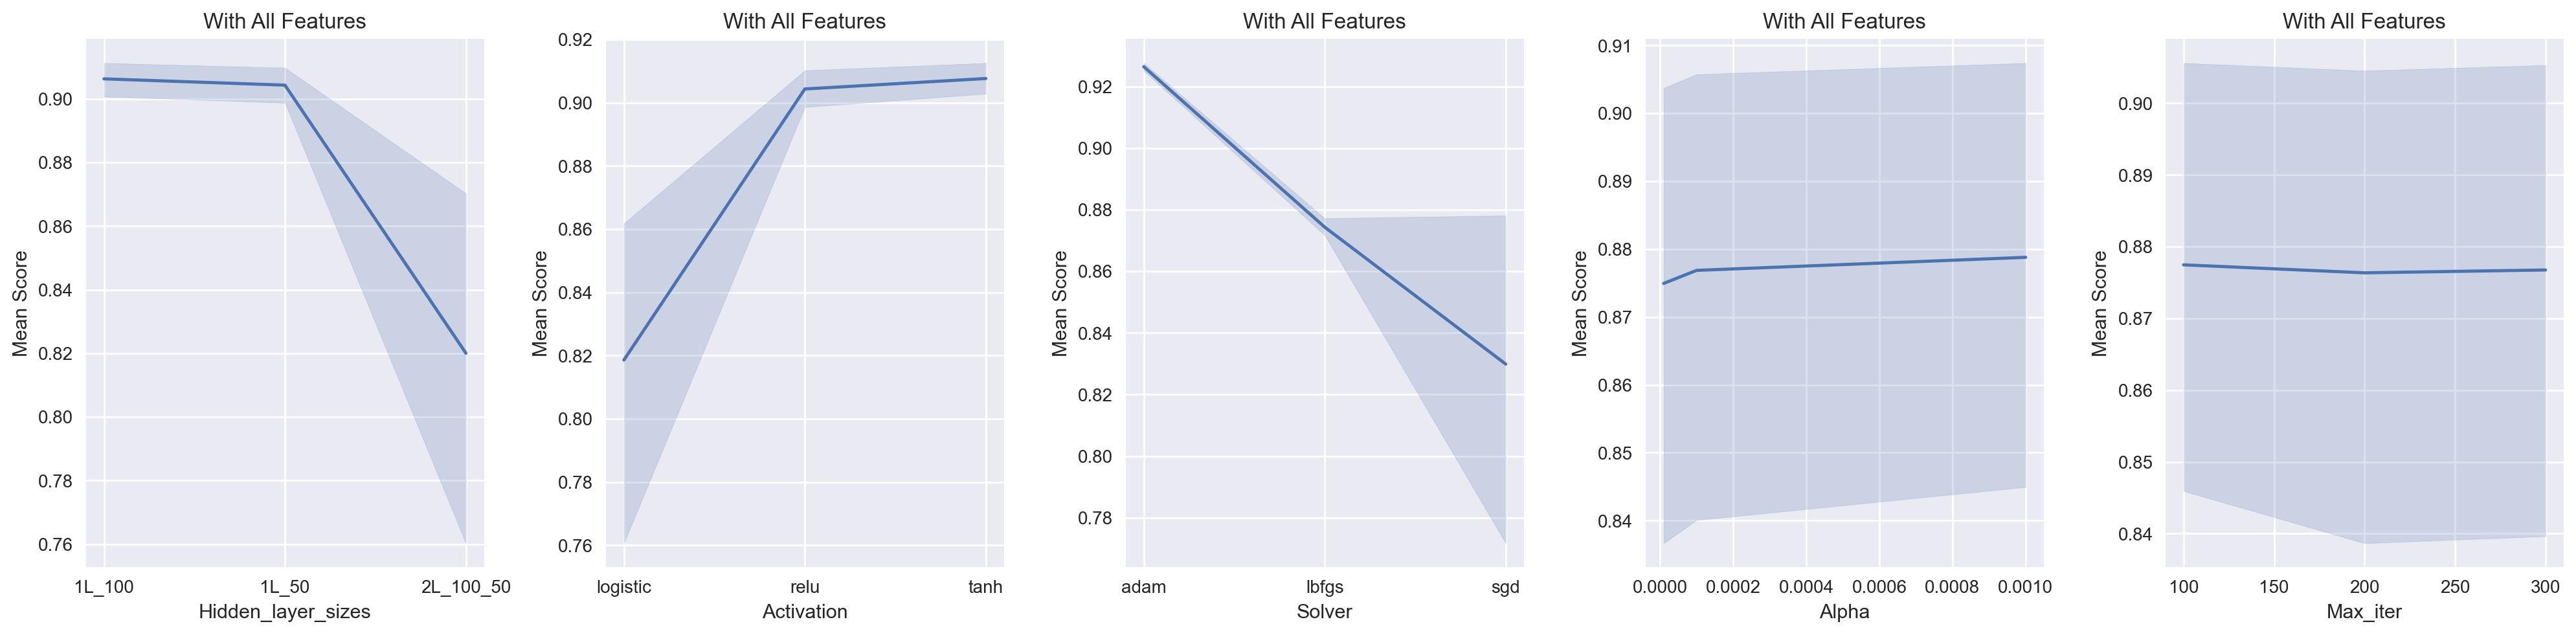

In [75]:
# Define the parameters to plot against mean_score
plt_params = param_grid_MLP.keys()

# Create subplots for each parameter
fig, axs = plt.subplots(1, len(plt_params), figsize=(20, 5))

# Plot each parameter against mean_score
for i, param in enumerate(plt_params):
    sns.lineplot(x=param, y='mean_score', data=gs_results_MLP.sort_values(by=param), ax=axs[i])
    axs[i].set_xlabel(param.capitalize())
    axs[i].set_ylabel('Mean Score')
    axs[i].set_title('With All Features')
plt.tight_layout()
plt.show()

<center>Graph 7 - MLP grid search results plot for all features</center>

Here we can observe the following:
* Number of Hidden Layers: Increasing the number of hidden layers decreased performance. The most optimal configuration is one layer with 100 neurons.

* Activation Function: The Tanh activation function appears to have a slight edge over ReLU based on the graph. However, the choice of activation function may interact with other parameters in selecting the best configuration.

* Solver Performance: The Adam solver demonstrates the strongest performance among the tested solvers.

* Regularization Strength: An alpha value of 0.001 produces the best performance, although the difference is minimal.

* Number of Iterations: Using 100 iterations produces the best performance. Increasing the number of iterations beyond this point does not lead to performance improvement.

##### Top 12 feature set
Below are the plots displaying the grid search results for top 12 features.

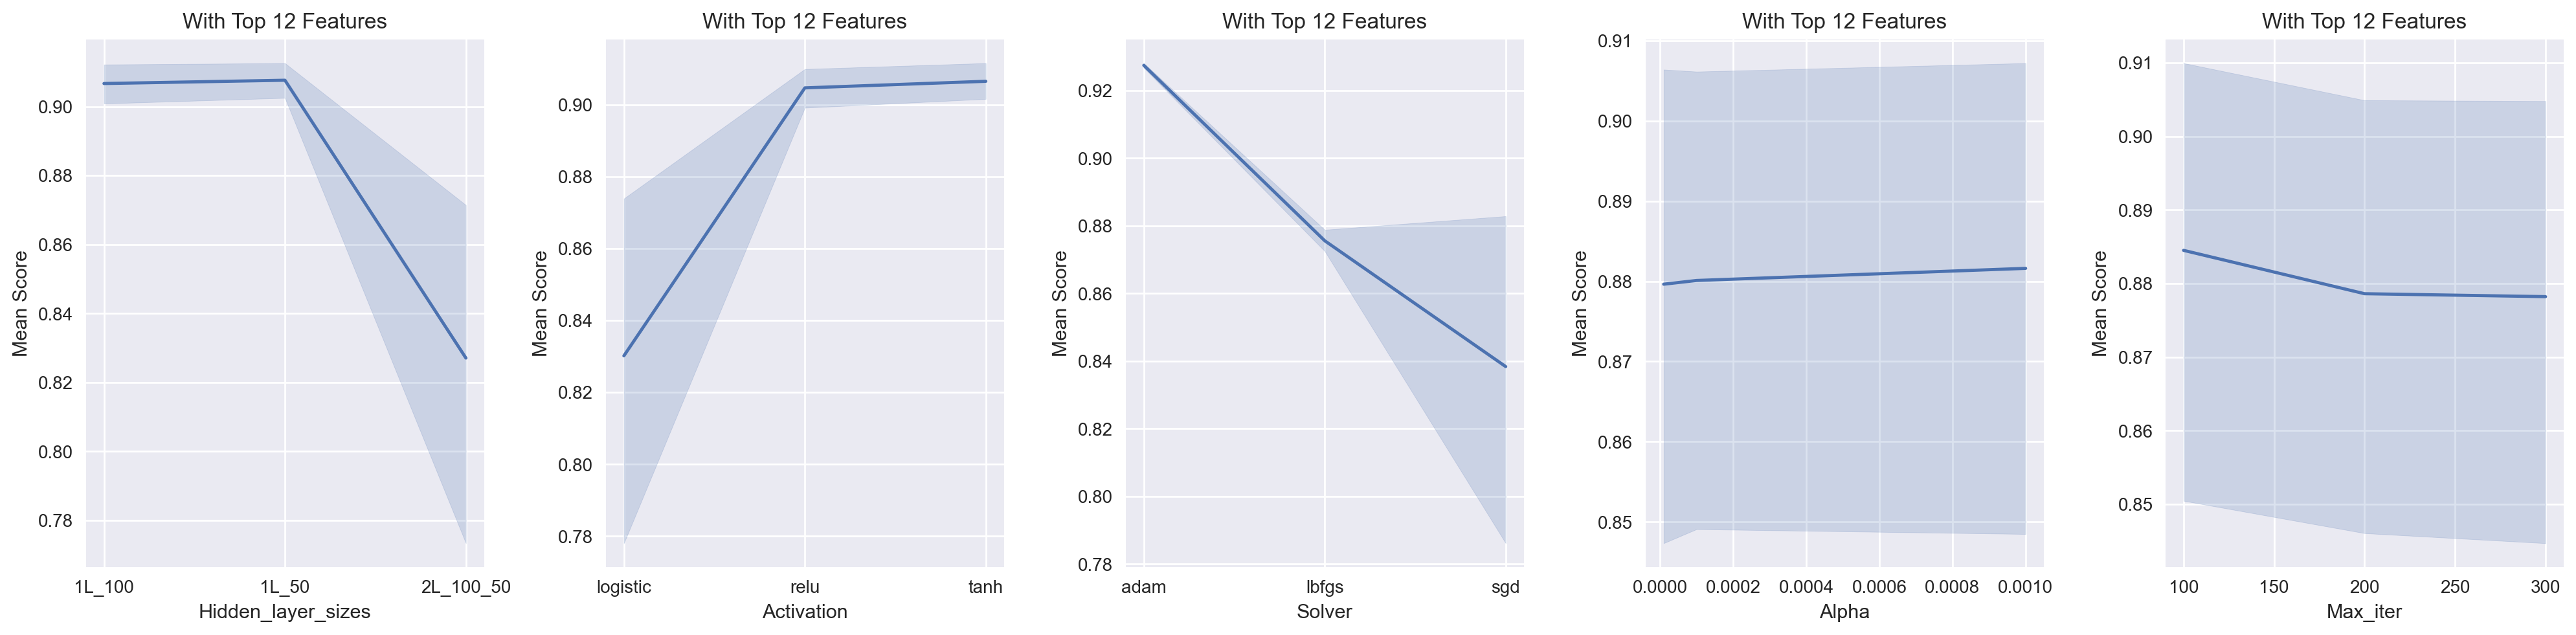

In [76]:
# Create subplots for each parameter
fig, axs = plt.subplots(1, len(plt_params), figsize=(20, 5))

# Plot each parameter against mean_score
for i, param in enumerate(plt_params):
    sns.lineplot(x=param, y='mean_score', data=gs_results_MLP_FS.sort_values(by=param), ax=axs[i])
    axs[i].set_xlabel(param.capitalize())
    axs[i].set_ylabel('Mean Score')
    axs[i].set_title('With Top 12 Features')
plt.tight_layout()
plt.show()

<center>Graph 8 - MLP grid search results plot for top 12 features</center>

We observe that these graphs exhibit similar trends to those seen in the results obtained using the dataset with all features.

Let's visualize the relationships between the solver and maximum iteration parameters for both the full set of features and the top 12 features.

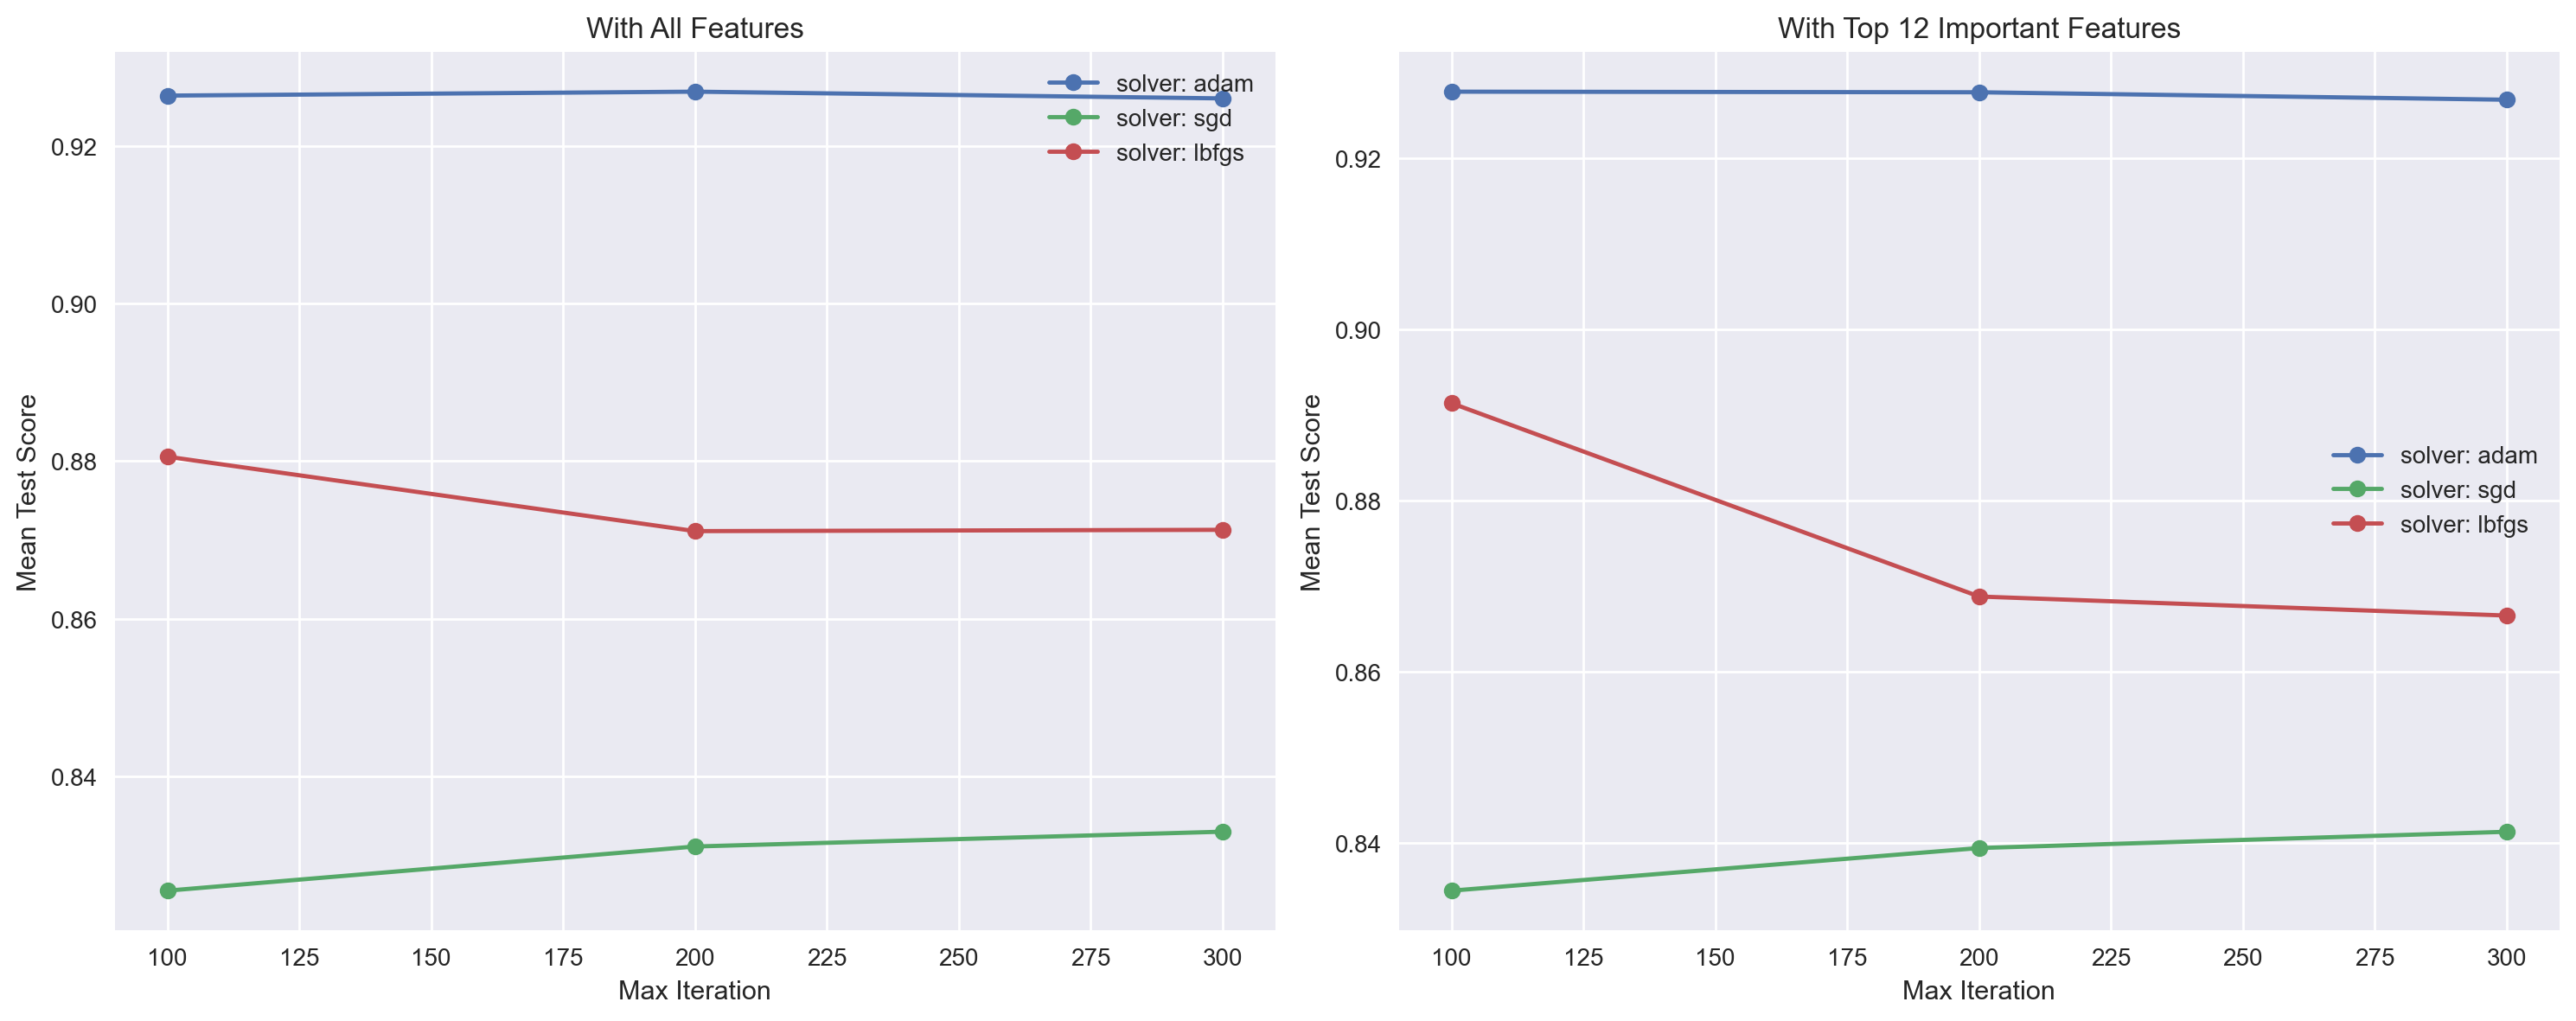

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot for All features
for i in param_grid_MLP['solver']:
    temp = gs_results_MLP[gs_results_MLP['solver'] == i]
    temp_avg = temp.groupby('max_iter').agg({'mean_score': 'mean'})
    ax1.plot(temp_avg, marker='o', label='solver: ' + str(i))
ax1.legend()
ax1.set_xlabel('Max Iteration')
ax1.set_ylabel('Mean Test Score')
ax1.set_title('With All Features')
ax1.grid(True)

# Plot for the 12 top features
for i in param_grid_MLP['solver']:
    temp = gs_results_MLP_FS[gs_results_MLP_FS['solver'] == i]
    temp_avg = temp.groupby('max_iter').agg({'mean_score': 'mean'})
    ax2.plot(temp_avg, marker='o', label='solver: ' + str(i))
ax2.legend()
ax2.set_xlabel('Max Iteration')
ax2.set_ylabel('Mean Test Score')
ax2.set_title('With Top 12 Important Features')
ax2.grid(True)

plt.tight_layout()
plt.show()

<center>Graph 9 - MLP grid search results plot</center>

The Adam solver demonstrates superior performance compared to other solver methods, as observed with both all features and the top 12 features.

Now, let's visualize the relationship between the number of hidden layers and activation functions for each solver method, using the full set of features.

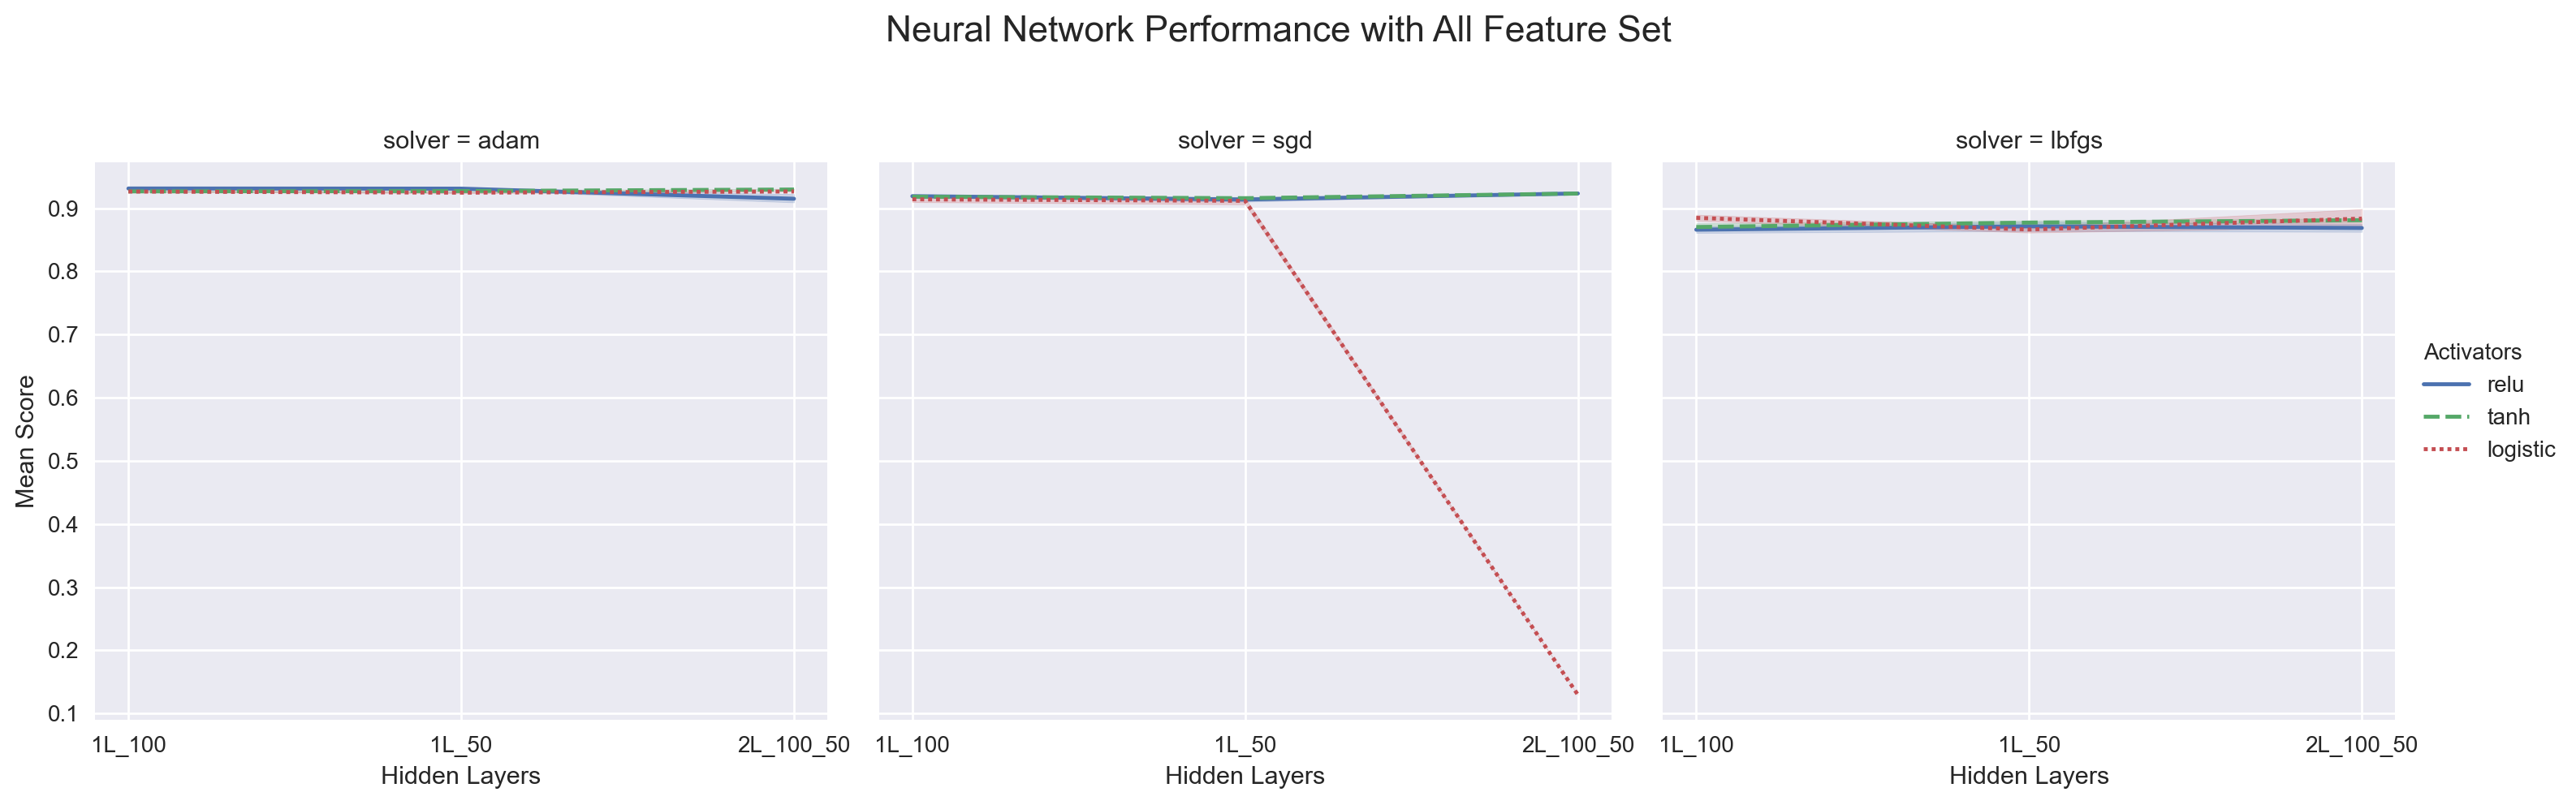

In [78]:
import seaborn as sns
rel_plot = sns.relplot(
    data=gs_results_MLP, x="hidden_layer_sizes", y="mean_score",
    col="solver", hue="activation", style="activation",
    kind="line"
)
rel_plot.axes[0,0].set_xlabel('Hidden Layers')
rel_plot.axes[0,1].set_xlabel('Hidden Layers')
rel_plot.axes[0,2].set_xlabel('Hidden Layers')
rel_plot.axes[0,0].set_ylabel('Mean Score')
rel_plot._legend.set_title("Activators")
rel_plot._legend._legend_box.align = "left"
rel_plot.fig.subplots_adjust(top=0.8)
rel_plot.fig.suptitle('Neural Network Performance with All Feature Set', fontsize=16)
plt.show(rel_plot)

<center>Graph 10 - MLP grid search results plot</center>

The Adam algorithm outperforms all other solver algorithms. Specifically, within the Adam solver, a single hidden layer with 100 neurons performs better than other hidden layer configurations.

Now, let's visualize the relationship between the number of hidden layers and activation functions for each solver method, using the top 12 set of features.

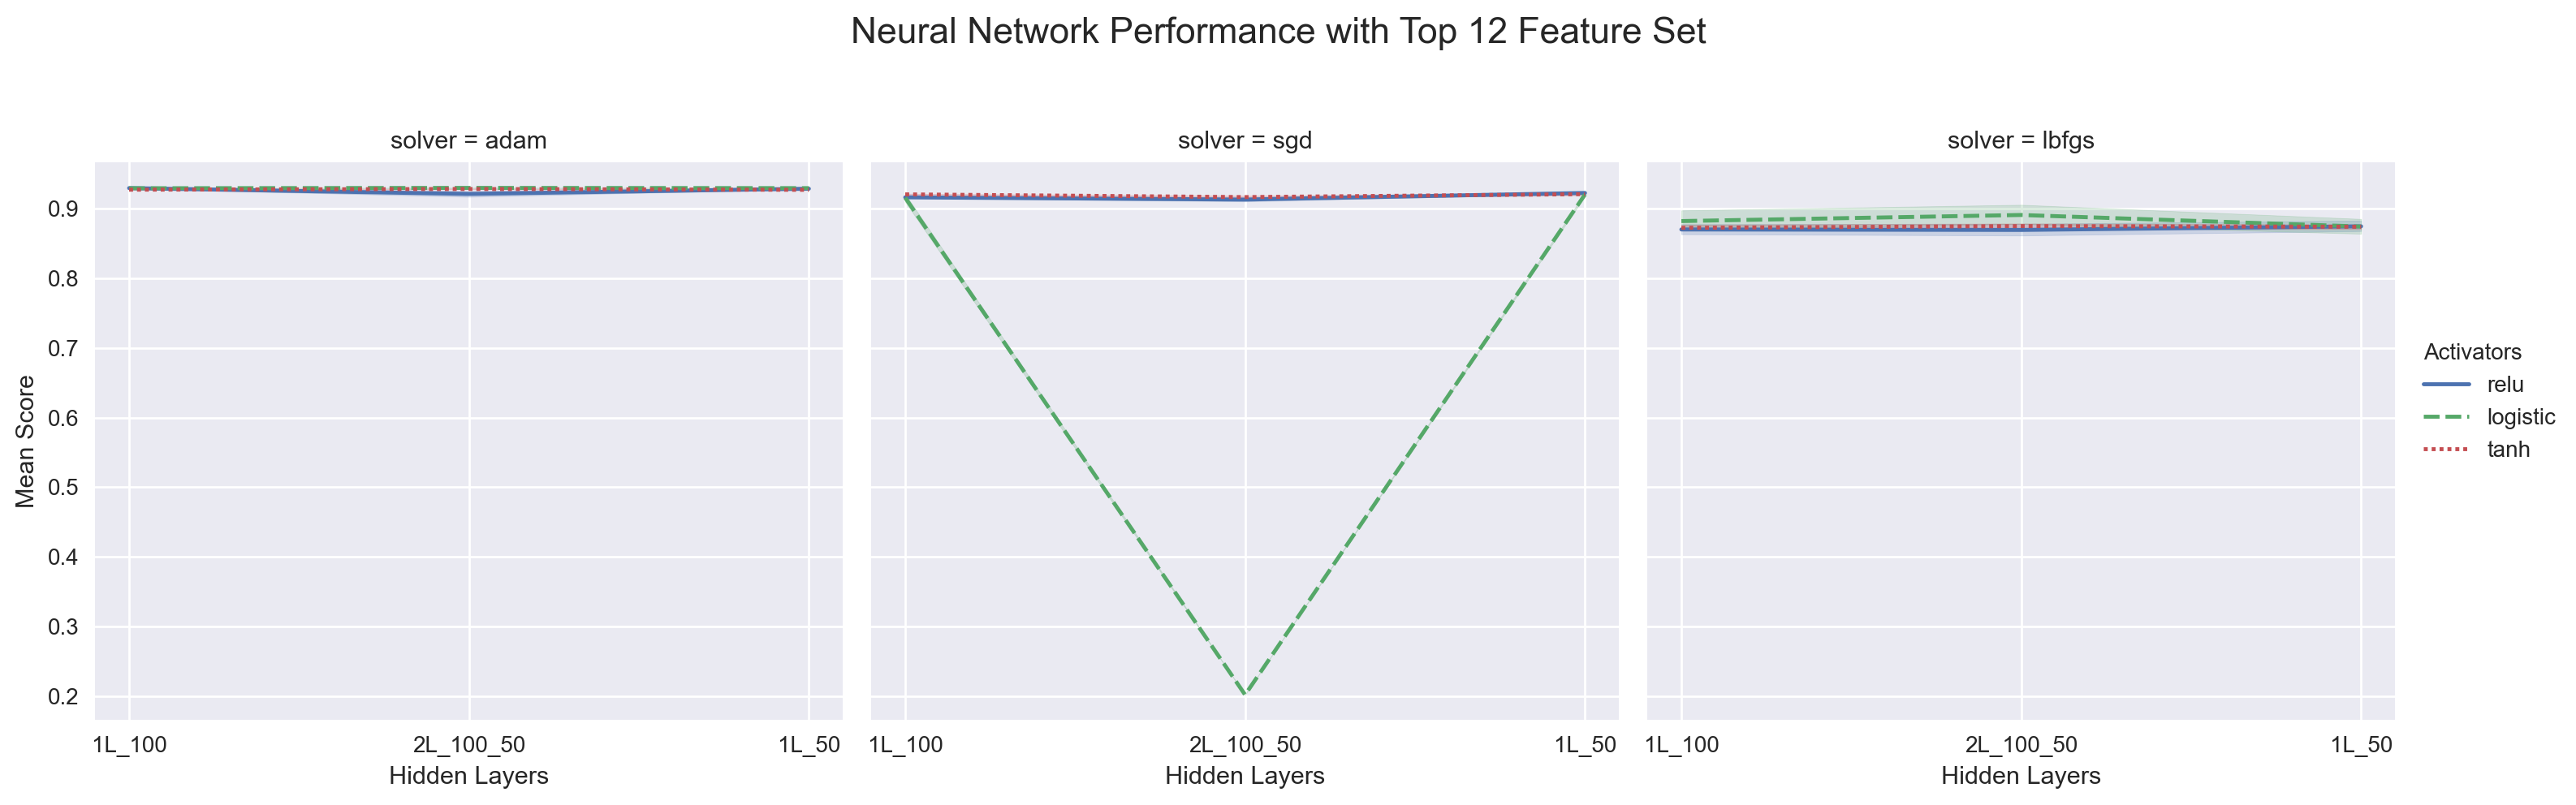

In [79]:
import seaborn as sns
rel_plot = sns.relplot(
    data=gs_results_MLP_FS, x="hidden_layer_sizes", y="mean_score",
    col="solver", hue="activation", style="activation",
    kind="line"
)
rel_plot.axes[0,0].set_xlabel('Hidden Layers')
rel_plot.axes[0,1].set_xlabel('Hidden Layers')
rel_plot.axes[0,2].set_xlabel('Hidden Layers')
rel_plot.axes[0,0].set_ylabel('Mean Score')
rel_plot._legend.set_title("Activators")
rel_plot._legend._legend_box.align = "left"
rel_plot.fig.subplots_adjust(top=0.8)
rel_plot.fig.suptitle('Neural Network Performance with Top 12 Feature Set', fontsize=16)
plt.show(rel_plot)

<center>Graph 11 - MLP grid search results plot</center>

Consistent with the findings for the full feature set, the Adam algorithm demonstrates superior performance compared to other solver algorithms. Specifically, within the Adam solver, a single hidden layer with 100 neurons performs best, with no improvement observed by increasing the number of hidden layers or decreasing the number of neurons.

### Performance evaluation using test data (All features) <a id='neural-network-evaluation-all-features'></a>
Let's evaluate the performance of the model using the best optimal parameters obtained from the hyperparameter tuning. We will train this model on the test dataset with all features.

During the hyperparameter tuning for all features, the best parameters identified were: the 'relu' activation function, an 'alpha' regularization parameter of 0.001, a single hidden layer with 100 neurons, a maximum of 200 iterations, and the 'adam' solver for weight optimization.

Now, we will fit the tuned classifier with these optimal parameters on the test data using cross-validation to determine the model's performance. The test data, which was not used during training, will provide an unbiased evaluation of the tuned classifier's performance.

In [80]:
# Train the Gradient Boosting model with best paramters from Full Feature dataset
test_mlp = MLPClassifier(hidden_layer_sizes=(100,), 
                         activation='relu',
                         solver='adam', 
                         learning_rate='constant',
                         max_iter=200,
                         random_state=42)

cv_results_MLP = cross_val_score(estimator=test_mlp,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
mlp_auc = cv_results_MLP.mean()
print('Neural Network AUC Score with All Features:', mlp_auc)

Neural Network AUC Score with All Features: 0.8986428571428572


The performance score is 0.8986. This is reasonably good compared to the score of 0.933 achieved on the training data. For this evaluation, we used stratified 5-fold cross-validation on the test data with no repetitions.

### Performance evaluation using test data (Top 12 features) <a id='neural-network-evaluation-12-features'></a>

Similarly, we will train the tuned MLP classifier with the best parameters obtained using the top 12 features on the test data.

In [81]:
# Train the Gradient Boosting model with best paramters from top 12 Feature dataset
test_mlp_fs = MLPClassifier(hidden_layer_sizes=(100,), 
                         activation='relu',
                         solver='adam', 
                         learning_rate='constant',
                         max_iter=200,
                         random_state=42)

cv_results_MLP_fs = cross_val_score(estimator=test_mlp_fs,
                                 X=D_test_FS,
                                 y=t_test_FS, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
mlp_auc_fs = cv_results_MLP_fs.mean()
print('Neural Network AUC Score with 12 Selected Features:', mlp_auc_fs)

Neural Network AUC Score with 12 Selected Features: 0.8980396825396826


The performance score using the top 12 features is 0.898, which is slightly better than the score achieved using all features. This indicates that the model performs better with the top 12 features compared to using the entire feature set. The improvement in performance suggests that these selected features capture the most relevant information for the classification task, reducing noise and potentially avoiding overfitting. Consequently, feature selection has proven beneficial for enhancing the model's predictive accuracy.

## Model Performance Comparison<a id='model-comparison'></a>

Here, we evaluate and compare the performance of all trained models on both the training and test datasets.

### Model Cross-Validation AUC Evaluation Results During Tuning on Train Data<a id='model-cross-validation-evaluation-results'></a>

In this section, we compare the AUC performance of all models using the best parameters achieved through hyperparameter tuning on **training dataset**, considering both the full set of features and the top 12 selected features.

#### Performance evaluation trained on all features set

In [82]:
# Evaulation results of Models trained on All features
model_performance_all_set = pd.DataFrame({
    'Model': ['KNN', 'SVC', 'RandomForest', 'DecisionTree','GradientBoostingClassifier','Multilayer Perceptron Classifier'],
    'Best Params': [grid_search_KNN.best_params_, 
                    grid_search_SVC.best_params_, 
                    grid_search_RF.best_params_, 
                    grid_search_DT.best_params_, 
                    grid_search_GB.best_params_,
                    grid_search_MLP.best_params_],
    'AUC Score': [grid_search_KNN.best_score_, 
                    grid_search_SVC.best_score_, 
                    grid_search_RF.best_score_, 
                    grid_search_DT.best_score_, 
                    grid_search_GB.best_score_,
                    grid_search_MLP.best_score_],
})

model_performance_all_set = model_performance_all_set.sort_values(by='AUC Score', ascending=False)
model_performance_all_set

,Model,Best Params,AUC Score
4,GradientBoostingClassifier,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}",0.936290
2,RandomForest,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 400}",0.935516
1,SVC,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.933026
5,Multilayer Perceptron Classifier,"{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'max_iter': 200, 'solver': 'adam'}",0.932906
0,KNN,"{'metric': 'euclidean', 'n_neighbors': 27}",0.928236
3,DecisionTree,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 60}",0.905229


#### Performance evaluation trained on top 12 features set

In [83]:
# Evaulation results of Models trained on top 12 features
model_performance_selected_set = pd.DataFrame({
    'Model': ['KNN', 'SVC', 'RandomForest', 'DecisionTree','GradientBoostingClassifier','Multilayer Perceptron Classifier'],
    'Best Params': [grid_search_KNN_FS.best_params_, 
                    grid_search_SVC_FS.best_params_, 
                    grid_search_RF_FS.best_params_, 
                    grid_search_DT_FS.best_params_, 
                    grid_search_GB_FS.best_params_,
                    grid_search_MLP_FS.best_params_],
    'AUC Score': [grid_search_KNN_FS.best_score_, 
                    grid_search_SVC_FS.best_score_, 
                    grid_search_RF_FS.best_score_, 
                    grid_search_DT_FS.best_score_, 
                    grid_search_GB_FS.best_score_,
                    grid_search_MLP_FS.best_score_],
})

model_performance_selected_set = model_performance_selected_set.sort_values(by='AUC Score', ascending=False)
model_performance_selected_set

,Model,Best Params,AUC Score
4,GradientBoostingClassifier,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}",0.937659
2,RandomForest,"{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200}",0.936786
5,Multilayer Perceptron Classifier,"{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'max_iter': 200, 'solver': 'adam'}",0.930308
0,KNN,"{'metric': 'manhattan', 'n_neighbors': 11}",0.928920
1,SVC,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.928309
3,DecisionTree,"{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 40}",0.908703


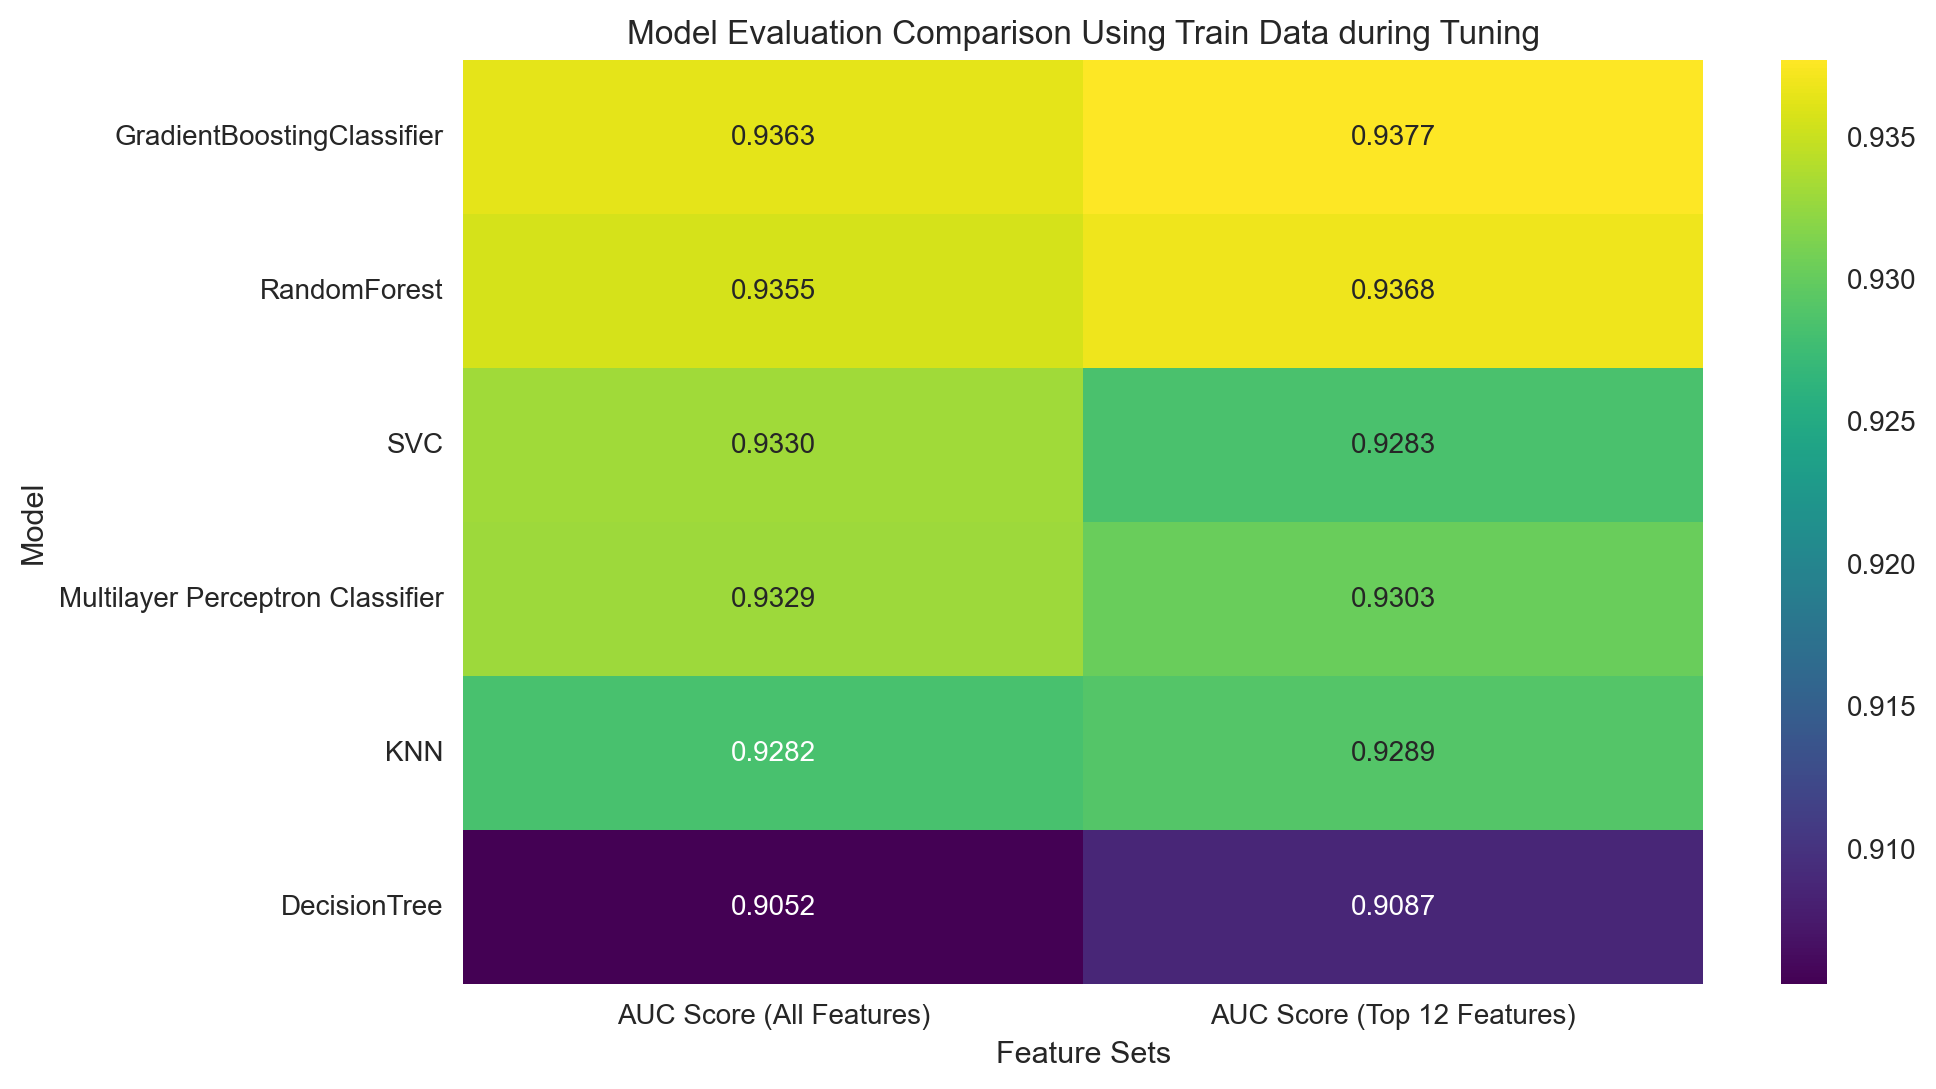

In [84]:
model_performance_all_set_mod = model_performance_all_set[['Model','AUC Score']]
model_performance_all_set_mod.rename(columns={'AUC Score': 'AUC Score (All Features)'}, inplace=True)

model_performance_selected_set_mod = model_performance_selected_set[['Model','AUC Score']]
model_performance_selected_set_mod.rename(columns={'AUC Score': 'AUC Score (Top 12 Features)'}, inplace=True)

# Merge the two dataframes on the 'Model' column
model_performance_merged = pd.merge(model_performance_all_set_mod, model_performance_selected_set_mod, on='Model')

# Set the 'Model' column as index
model_performance_merged.set_index('Model', inplace=True)

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(model_performance_merged, annot=True, cmap='viridis', fmt='.4f', cbar=True)
plt.title('Model Evaluation Comparison Using Train Data during Tuning')
plt.xlabel('Feature Sets');

<center>Graph 12 - Model Evaluation Comparison Using Train Data during Tuning</center>

* The Gradient Boosting Classifier performed the best on the training data using both all features and the top 12 features, achieving AUC scores of 0.936 and 0.937 respectively.


* Random Forest also showed strong performance on both datasets, with AUC scores of 0.936 and 0.936 using all features and the top 12 features respectively.

* The Multilayer Perceptron Classifier performed consistently well but slightly lower than the ensemble methods, with AUC scores of 0.930 and 0.933 using all features and the top 12 features respectively.


* KNN and SVC showed relatively similar performance, with AUC scores around 0.928 for both datasets.


* Decision Tree had the lowest performance among the models, with AUC scores around 0.908 and 0.905 using all features and the top 12 features respectively.

In summary, when considering the training data and the best-tuned classifier models, the GradientBoosting model exhibited the highest performance when utilizing the top 12 feature set.

### Model Cross-Validation AUC Evaluation Results on Train Data<a id='model-prediction-evaluation-results'></a>
In this section, we compare the AUC performance of all models using the best parameters achieved through hyperparameter tuning on **testing dataset**, considering both the full set of features and the top 12 selected features.

In [85]:
# Evaulation results of Models trained on All features
model_prediction_all_set = pd.DataFrame({
    'Model': ['KNN', 'SVC', 'RandomForest', 'DecisionTree','GradientBoostingClassifier','Multilayer Perceptron Classifier'],
    'Best Params': [grid_search_KNN.best_params_, 
                    grid_search_SVC.best_params_, 
                    grid_search_RF.best_params_, 
                    grid_search_DT.best_params_, 
                    grid_search_GB.best_params_,
                    grid_search_MLP.best_params_],
    'AUC Score': [knn_auc, 
                    svc_auc, 
                    rf_auc, 
                    dt_auc, 
                    gb_auc,
                    mlp_auc],
})

model_prediction_all_set = model_prediction_all_set.sort_values(by='AUC Score', ascending=False)
model_prediction_all_set

,Model,Best Params,AUC Score
2,RandomForest,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 400}",0.913381
1,SVC,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.908869
0,KNN,"{'metric': 'euclidean', 'n_neighbors': 27}",0.900190
5,Multilayer Perceptron Classifier,"{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'max_iter': 200, 'solver': 'adam'}",0.898643
4,GradientBoostingClassifier,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}",0.898075
3,DecisionTree,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 60}",0.783935


In [86]:
# Evaulation results of Models trained on All features
model_prediction_selected_set = pd.DataFrame({
    'Model': ['KNN', 'SVC', 'RandomForest', 'DecisionTree','GradientBoostingClassifier','Multilayer Perceptron Classifier'],
    'Best Params': [grid_search_KNN_FS.best_params_, 
                    grid_search_SVC_FS.best_params_, 
                    grid_search_RF_FS.best_params_, 
                    grid_search_DT_FS.best_params_, 
                    grid_search_GB_FS.best_params_,
                    grid_search_MLP_FS.best_params_],
    'AUC Score': [knn_auc, 
                    svc_auc_fs, 
                    rf_auc_fs, 
                    dt_auc_fs, 
                    gb_auc_fs,
                    mlp_auc_fs],
})

model_prediction_selected_set = model_prediction_selected_set.sort_values(by='AUC Score', ascending=False)
model_prediction_selected_set

,Model,Best Params,AUC Score
2,RandomForest,"{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200}",0.912317
1,SVC,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.910155
4,GradientBoostingClassifier,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}",0.900337
0,KNN,"{'metric': 'manhattan', 'n_neighbors': 11}",0.900190
5,Multilayer Perceptron Classifier,"{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'max_iter': 200, 'solver': 'adam'}",0.898040
3,DecisionTree,"{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 40}",0.800236


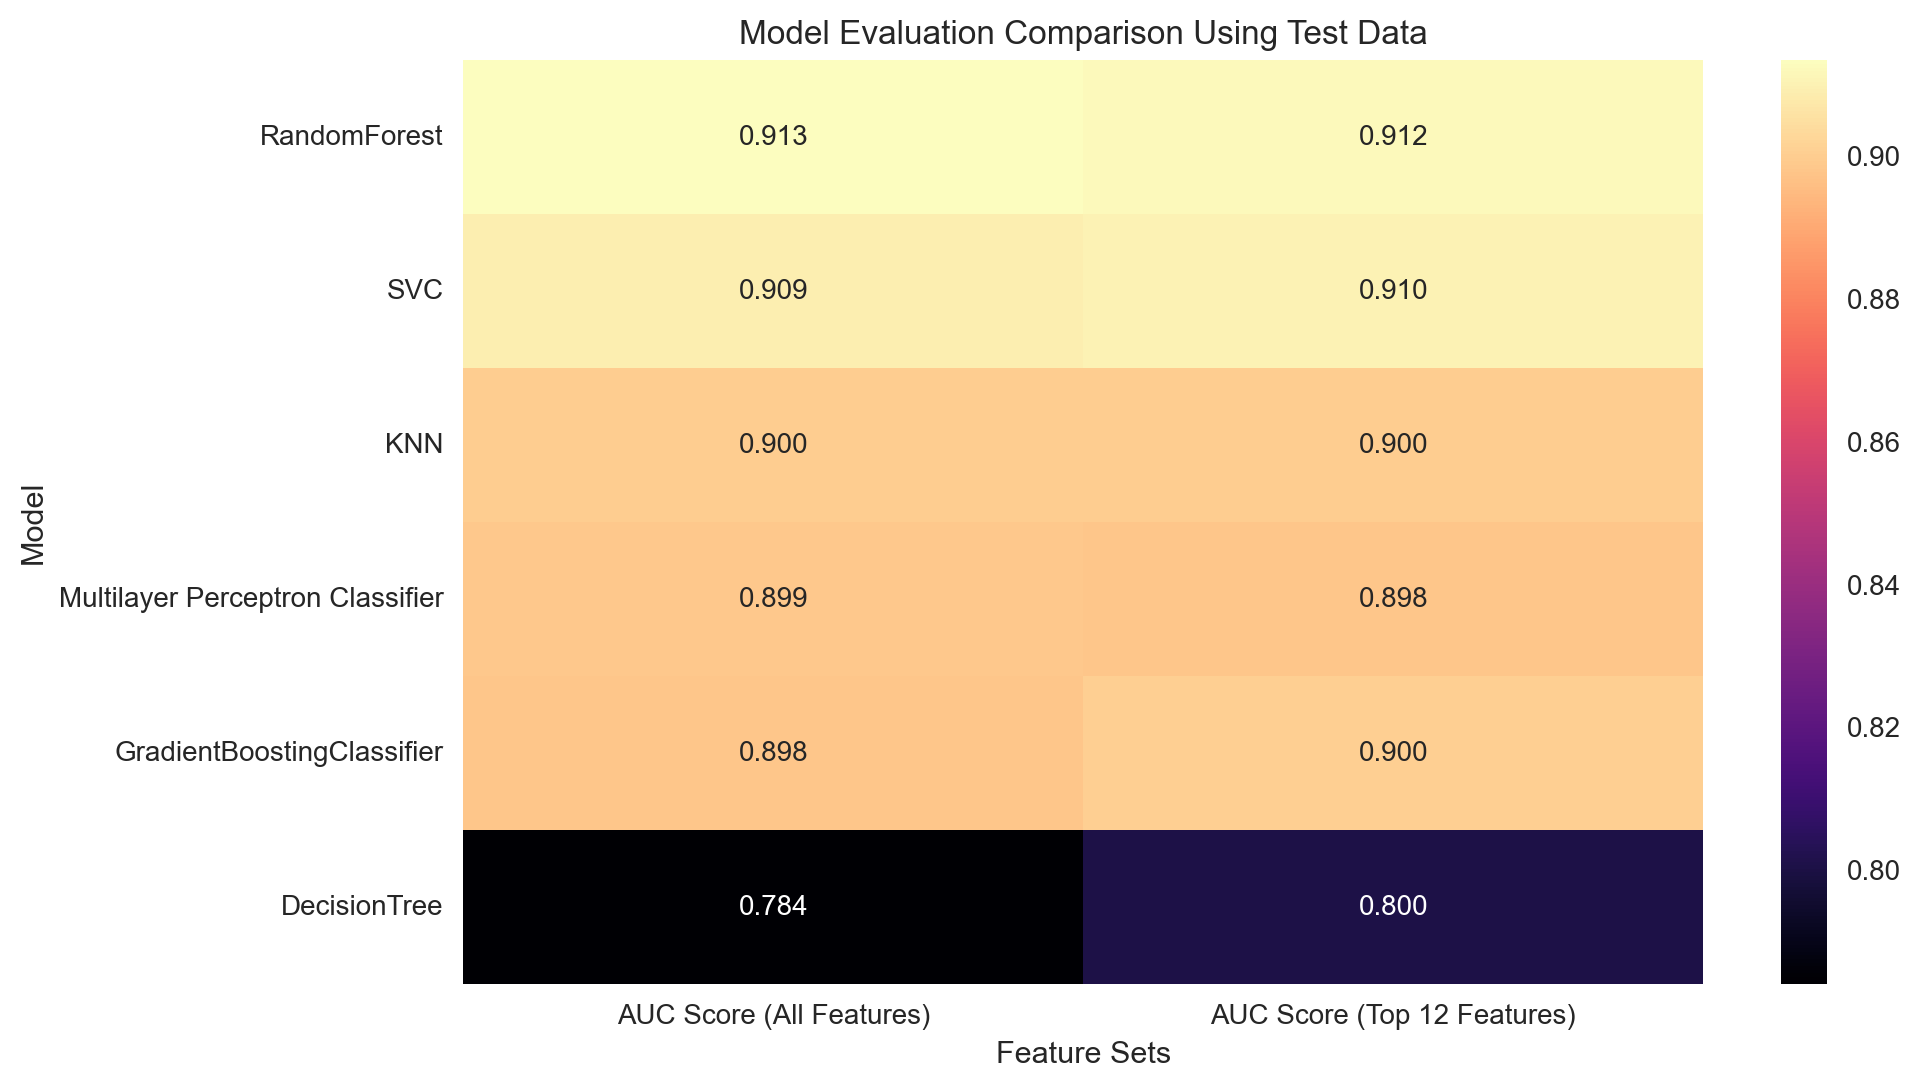

In [87]:
model_prediction_all_set_mod = model_prediction_all_set[['Model','AUC Score']]
model_prediction_all_set_mod.rename(columns={'AUC Score': 'AUC Score (All Features)'}, inplace=True)

model_prediction_selected_set_mod = model_prediction_selected_set[['Model','AUC Score']]
model_prediction_selected_set_mod.rename(columns={'AUC Score': 'AUC Score (Top 12 Features)'}, inplace=True)

# Merge the two dataframes on the 'Model' column
model_prediction_merged = pd.merge(model_prediction_all_set_mod, model_prediction_selected_set_mod, on='Model')

# Set the 'Model' column as index
model_prediction_merged.set_index('Model', inplace=True)

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(model_prediction_merged, annot=True, cmap='magma', fmt='.3f', cbar=True)
plt.title('Model Evaluation Comparison Using Test Data')
plt.xlabel('Feature Sets');

<center>Graph 13 - Model Evaluation Comparison Using Test Data</center>

Cross-validation AUC performance is tested using the tuned classifiers on the same test partitions with a fixed random state, making the results 'paired' from a statistical perspective. Therefore, we will run paired t-tests on all the results.

When comparing the AUC scores of all models using the testing data with all features versus the top 12 features, several observations can be made:

* Random Forest, SVC, and Multilayer Perceptron Classifier models performed slightly better with the top 12 features compared to using all features, albeit the differences are marginal.


* KNN and GradientBoostingClassifier models also showed improved performance with the top 12 features, with the GradientBoostingClassifier showing a more noticeable increase in AUC score.


* The DecisionTree model displayed the most significant improvement when using the top 12 features, with a notable increase in AUC score from 0.7839 to 0.8002.


Overall, the top 12 features appear to offer a superior subset for classification tasks, as most models either maintained or improved their performance compared to using all features. The Random Forest model stood out as the best performer across both datasets, achieving an AUC score of 0.913 for all features and 0.912 for the top 12 features. This suggests that Random Forest is the most effective model for predicting heart disease in this scenario.

### Paired t-test - Test Data<a id='paired-t-tests-all-feature'></a>

Here are the results of the paired t-tests between each pair of models. A p-value greater than 0.05 indicates that there is no statistically significant difference between the models, while a p-value less than 0.05 suggests a significant difference in their performances.

The paired t-tests compare the performance of different machine learning models to determine if there is a statistically significant difference between their CV AUC scores.

##### Paired t-tests (Test dataset with all features)

In [88]:
print(stats.ttest_rel(cv_results_RF, cv_results_SVC))
print(stats.ttest_rel(cv_results_SVC, cv_results_KNN))
print(stats.ttest_rel(cv_results_KNN, cv_results_MLP))
print(stats.ttest_rel(cv_results_MLP, cv_results_GB))
print(stats.ttest_rel(cv_results_GB, cv_results_DT))

TtestResult(statistic=0.22333599555633823, pvalue=0.8342161027449836, df=4)
TtestResult(statistic=0.8149160833789789, pvalue=0.4608575943847922, df=4)
TtestResult(statistic=0.09040382161079415, pvalue=0.9323123330573531, df=4)
TtestResult(statistic=0.016241804193360968, pvalue=0.9878193162658568, df=4)
TtestResult(statistic=4.9989262162349775, pvalue=0.00749612678860256, df=4)


In [89]:
print(stats.ttest_rel(cv_results_DT, cv_results_RF))
print(stats.ttest_rel(cv_results_DT, cv_results_SVC))
print(stats.ttest_rel(cv_results_DT, cv_results_KNN))
print(stats.ttest_rel(cv_results_DT, cv_results_MLP))
print(stats.ttest_rel(cv_results_DT, cv_results_GB))

TtestResult(statistic=-8.902106929549563, pvalue=0.0008800364642071189, df=4)
TtestResult(statistic=-8.109290089425793, pvalue=0.0012572639051359913, df=4)
TtestResult(statistic=-4.637881155289604, pvalue=0.009749460898831231, df=4)
TtestResult(statistic=-7.770428069903827, pvalue=0.0014786968400603375, df=4)
TtestResult(statistic=-4.9989262162349775, pvalue=0.00749612678860256, df=4)


The tests indicate that there are no statistically significant differences (p-value greater than 0.05) in performance among most models (RF, SVC, KNN, MLP, GB) when compared to each other, except when compared to the Decision Tree model. A high p-value suggests that any observed difference between the models is likely due to random chance.

In contrast, the Decision Tree shows significant differences in performance when compared with all other models, suggesting that it performs worse than the others.

##### Paired t-tests (Test dataset with top 12 features)

In [90]:
print(stats.ttest_rel(cv_results_RF_fs, cv_results_SVC_fs))
print(stats.ttest_rel(cv_results_SVC_fs, cv_results_KNN_fs))
print(stats.ttest_rel(cv_results_KNN_fs, cv_results_MLP_fs))
print(stats.ttest_rel(cv_results_MLP_fs, cv_results_GB_fs))
print(stats.ttest_rel(cv_results_GB_fs, cv_results_DT_fs))

TtestResult(statistic=0.1606988942773635, pvalue=0.8801198873514021, df=4)
TtestResult(statistic=1.6609813291742592, pvalue=0.17205362853914907, df=4)
TtestResult(statistic=-1.0415802301420092, pvalue=0.3564185201949074, df=4)
TtestResult(statistic=-0.09547176871561933, pvalue=0.928531819499689, df=4)
TtestResult(statistic=6.344608609397164, pvalue=0.0031609936638462193, df=4)


In [91]:
print(stats.ttest_rel(cv_results_DT_fs, cv_results_RF_fs))
print(stats.ttest_rel(cv_results_DT_fs, cv_results_SVC_fs))
print(stats.ttest_rel(cv_results_DT_fs, cv_results_KNN_fs))
print(stats.ttest_rel(cv_results_DT_fs, cv_results_MLP_fs))
print(stats.ttest_rel(cv_results_DT_fs, cv_results_GB_fs))

TtestResult(statistic=-11.658498568026953, pvalue=0.00030943831840881704, df=4)
TtestResult(statistic=-8.504106443046723, pvalue=0.0010486390584301107, df=4)
TtestResult(statistic=-5.255942847456297, pvalue=0.0062717789662788855, df=4)
TtestResult(statistic=-7.334492438104006, pvalue=0.0018394121240642052, df=4)
TtestResult(statistic=-6.344608609397164, pvalue=0.0031609936638462193, df=4)


The results are consistent with those obtained using the full dataset. Comparisons involving the Decision Tree (DT) show significant differences, suggesting that DT performs poorly from the other models. In contrast, there is no significant difference between Random Forest (RF), Support Vector Classifier (SVC), Gradient Boosting (GB), K-Nearest Neighbors (KNN), and Multi-Layer Perceptron (MLP) when compared against each other.


##### Comparing Performance Between Full Features and Top 12 Most Important Features Dataset

Now, let's compare the AUC scores obtained using the full feature set against those obtained using the top 12 most important features. Both datasets are derived from the same data with the same random state; the only difference is that one dataset contains all features while the other contains only the 12 most important ones. Therefore, we can use paired t-tests to determine if there is a statistically significant difference in performance between the two datasets.

In [92]:
print(stats.ttest_rel(cv_results_RF, cv_results_RF_fs))
print(stats.ttest_rel(cv_results_SVC, cv_results_SVC_fs))
print(stats.ttest_rel(cv_results_KNN, cv_results_KNN_fs))
print(stats.ttest_rel(cv_results_MLP, cv_results_MLP_fs))
print(stats.ttest_rel(cv_results_GB, cv_results_GB_fs))
print(stats.ttest_rel(cv_results_DT, cv_results_DT_fs))

TtestResult(statistic=0.15389884339031729, pvalue=0.885141891222168, df=4)
TtestResult(statistic=-0.09572991679590641, pvalue=0.9283393099783073, df=4)
TtestResult(statistic=1.0691973857969526, pvalue=0.34521051680243603, df=4)
TtestResult(statistic=0.06503634878474622, pvalue=0.9512656729263353, df=4)
TtestResult(statistic=-0.1334101412127169, pvalue=0.9003116797407522, df=4)
TtestResult(statistic=-1.163483294883158, pvalue=0.30930640568092255, df=4)


These paired t-tests compare the performance of models trained on the full feature set against models trained on the top 12 most important features. The results indicate that there is no statistically significant difference in performance between the two sets of models for any of the classifiers. This suggests that the reduced feature set of the top 12 most important features is sufficient for achieving comparable performance to using the full feature set.

To conclude, based on the AUC performance score and paired t-test results, the best-performing model when using all features is the Gradient Boosting model. However, when using only the top 12 most important features, the RandomForest model outperforms the others.

Overall, the results suggest that there is no significant difference in model performance between using the full feature set and the top 12 most important features for any of the evaluated models. This indicates that the RandomForest model might be preferred for its simplicity and efficiency, as it performs well even with a reduced set of features.



---

We optimized each classifier's hyperparameters using the AUC metric in the previous sections. However, for a comprehensive analysis, let's examine the following metrics for each model with their best-tuned hyperparameters using the top 12 feature set:
- Accuracy
- Precision
- Recall
- F1 Score
- Confusion Matrix

These metrics can be obtained from the classification reports, which are displayed below.

In [93]:
pred_KNN_FS = grid_search_KNN_FS.predict(D_test_FS)
pred_SVC_FS = grid_search_SVC_FS.predict(D_test_FS)
pred_RF_FS  = grid_search_RF_FS.predict(D_test_FS)
pred_DT_FS  = grid_search_DT_FS.predict(D_test_FS)
pred_GB_FS  = grid_search_GB_FS.predict(D_test_FS)
pred_MLP_FS = grid_search_MLP_FS.predict(D_test_FS)

In [94]:
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(t_test_FS, pred_KNN_FS))
print("\nClassification report for Support Vector Classifier") 
print(metrics.classification_report(t_test_FS, pred_SVC_FS))
print("\nClassification report for Random Forest") 
print(metrics.classification_report(t_test_FS, pred_RF_FS))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(t_test_FS, pred_DT_FS))
print("\nClassification report for Gradient Boosting") 
print(metrics.classification_report(t_test_FS, pred_GB_FS))
print("\nClassification report for Neural Network") 
print(metrics.classification_report(t_test_FS, pred_MLP_FS))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        78
           1       0.85      0.85      0.85        71

    accuracy                           0.85       149
   macro avg       0.85      0.85      0.85       149
weighted avg       0.85      0.85      0.85       149


Classification report for Support Vector Classifier
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        78
           1       0.85      0.85      0.85        71

    accuracy                           0.85       149
   macro avg       0.85      0.85      0.85       149
weighted avg       0.85      0.85      0.85       149


Classification report for Random Forest
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        78
           1       0.86      0.80      0.83        71

    accuracy                           0.8

Confusion matrices are shown below.

In [95]:
print("\nConfusion Matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(t_test_FS, pred_KNN_FS))
print("\nConfusion Matrix for Support Vector Classifier") 
print(metrics.confusion_matrix(t_test_FS, pred_SVC_FS))
print("\nConfusion Matrix for Random Forest") 
print(metrics.confusion_matrix(t_test_FS, pred_RF_FS))
print("\nConfusion Matrix for Decision Tree") 
print(metrics.confusion_matrix(t_test_FS, pred_DT_FS))
print("\nConfusion Matrix for Gradient Boosting") 
print(metrics.confusion_matrix(t_test_FS, pred_GB_FS))
print("\nConfusion Matrix for Neural Network") 
print(metrics.confusion_matrix(t_test_FS, pred_MLP_FS))


Confusion Matrix for K-Nearest Neighbor
[[67 11]
 [11 60]]

Confusion Matrix for Support Vector Classifier
[[67 11]
 [11 60]]

Confusion Matrix for Random Forest
[[69  9]
 [14 57]]

Confusion Matrix for Decision Tree
[[66 12]
 [16 55]]

Confusion Matrix for Gradient Boosting
[[66 12]
 [17 54]]

Confusion Matrix for Neural Network
[[69  9]
 [12 59]]


Comparing the confusion matrices of the 6 classifier we can see that Random Forest and Neural Network classifiers gives the least number of false positives. They are equally effective in classifying true positives, however Neural Network performs marginally better in distinguishing between true negatives and false negatives. Other classifiers perform similarly in detecting true positives with KNN and SVC showing sligthly better outcome than Decision Tree and Gradient Boosting.




## Critique and Limitations <a id='critigue-and-limitations'></a>
----



In this project, we performed classification on 1190 observations with only 11 features. The number of observations decreased to 745 after dropping missing values. The size of the dataset may not be large enough to capture all the variability and patterns of heart disease. Moreover, the performance of the models could be improved by considering other demographic and health parameters as features. A larger dataset with more features could provide a more generalizable model and improve the predictive performance.

In phase 1 we have seen the presence of outliers in some features. The outliers were not removed, therefore, may have affected the performance. The dataset had significantly more male observations than female. This may have induced some bias in our model. Similarly, we have limited demographic information on the patients. If certain groups were underrepresented, it could also inadvertently lead to more bias.

We evaluated the performance of only 6 machine learning models including ANN model. Therefore, we cannot conclusively state that this is the best model there is for heart disease prediction. Additionally, in our project it was evident that the performance of random forest surpassed decision tree. this performance difference can be the result of inherent advantages of ensemble methods over single classifiers. The superior performance of Random Forests in our experiments suggests that combining multiple models can lead to more robust and accurate predictions.

While repeated stratified k-fold cross-validation provides a robust evaluation, it may not fully account for all potential sources of variability in the data. Different cross-validation strategies, larger validation sets, or additional repetitions of k-folds might offer more comprehensive performance estimates. However, we are limited by the computational power of our local devices and cannot perform more resource intensive validation. Models were evaluated on a small number of unseen test data using a stratified 5-fold cross-validation approach without repetitions. In the future, it would be beneficial to rerun the tests on a much larger dataset to further evaluate the models.

During our performance evaluation, we observed that all models showed similar performance with no significant statistical difference, except for DecisionTree. Therefore, further fine-tuning of parameters, along with a larger feature set, is needed to develop a more accurate and holistic model for heart disease prediction.

## Summary and Conclusions <a id='summary-and-conclusions'></a>
----

### Project Summary <a id='project-summary'></a>


In this project, we evaluate the performance of machine learning algorithms to predict heart disease among individuals. The goal is to determine the feasibility of using machine learning as a tool that helps medical practitioners in early diagnosis. We conducted our investigation on heart disease dataset from IEEE DataPort (Siddhartha, 2020). After cleaning and encoding nominal variables, we ended up with 16 features and 745 instances which were normalized for further analysis. We selected 12 best features for classification using F-score, then trained and tested learning algorithms on a 80-20 train test split. We compared the results of 6 algorithms – KNN, SVC, Random Forest, Decision Tree and Gradient Boost. The parameters of each learning model were tuned using gridsearch method and stratified k-folds for cross validation. Next, we performed t-tests to determine whether the variations between the performances are statistically significant. Finally, we compared confusion matrices from each model to see which one has least number of false positives. This step is crucial when analysing models for medical diagnosis because we need to minimize wrong diagnosis.

### Summary of Findings <a id='summary-of-findings'></a>

Our findings from phase 2 show that the models were quite accurate in identifying the positive heart disease cases with 12 features. For comparison, we ran classification on the whole dataset and the 12 best features and observed that the model performs marginally better with selected features. The results of paired t-test however, suggests that the difference is not statistically significant. However, performing classification on only 12 features is more efficient in terms of computational resources. Therefore, we used only 12 features for hyperparameter tuning and cross validation. 

Our results show that random forest performs best with a score of 0.913. While the worst performing model was decision tree with a score of 0.784. The other models had similar performance, having AUC ROC between 0.899 and 0.909. Paired t-test reveal that other then Decision Tree, the variations in score among the models is not statistically significant. Therefore, the models perform equally well in predicting heart disease. 

### Conclusion <a id='conclusion'></a>

In this study we evaluated the performance of 5 machine learning algorithms in heart disease prediction. Additionally, we included a Multi-Layer Perceptron (MLP) to explore the potential of neural networks in this context. Our methodology involved extensive preprocessing, including data cleaning, one-hot encoding of categorical variables, feature scaling, and feature selection. These steps ensured that our dataset was well-prepared for training robust and accurate models. Using grid search and repeated stratified k-fold cross-validation, we fine-tuned the hyperparameters of each model and evaluated their performance based on the ROC AUC score. Our results indicated that while some models performed better than others, the performance difference was likely due to randomness.

Despite the promising results, our study has several limitations. The relatively small dataset size, potential biases in the data, and the limited number of features could affect the generalizability of our findings. Future work should focus on validating these models with larger and more diverse datasets, exploring additional features, and investigating advanced algorithms and techniques.Our findings show merit in utilizing machine learning for heart disease diagnosis. However, ongoing research and development are essential to realize the full potential of these technologies in improving healthcare outcomes.


## References <a id='references'></a>
---

Alabdullatef, L. (2020, September 2). _Complete Guide to Adam Optimization_. Medium. https://medium.com/@LayanSA/complete-guide-to-adam-optimization-1e5f29532c3d

Nokeri, T. C. (2021). Neural Networks with Scikit-Learn, Keras, and H2O. In _Data Science Solutions with Python_ (pp. 75–88). Apress L. P. https://doi.org/10.1007/978-1-4842-7762-1_7

Osipyan, H., Edwards, B. I., & Cheok, A. D. (2022). _Deep Neural Network Applications_. Taylor & Francis Group.

Pajankar, A., & Joshi, A. (2022). _Hands-on Machine Learning with Python : Implement Neural Network Solutions with Scikit-learn and PyTorch_. Apress. https://doi.org/10.1007/978-1-4842-7921-2

Siddhartha, M. (2020, November 6). _Heart Disease dataset (Comprehensive)_. IEEE DataPort. https://dx.doi.org/10.21227/dz4t-cm36

Testas, A. (2023). Neural Network Classification with Pandas, Scikit-Learn, and PySpark. In _Distributed Machine Learning with PySpark_ (pp. 299–328). Apress L. P. https://doi.org/10.1007/978-1-4842-9751-3_12


